The study area for this dataset refers to the soybean crop in 9 states of the United States of America (USA). The dataset consists of weather, soil, and management data. Specifically, there are data of average observed yield through the time period of 1980 to 2018. There is also information about the cumulative percentage of planted fields within each state on a weekly basis. The starting point for this data is April on an annual basis. As for the weather data features, they consist of the precipitation, solar radiation, snow water equivalent, vapor pressure, minimum and maximum temperature. The soil data features include wet soil bulk density, dry bulk density, clay percentage, the upper limit of plant-available water content, lower limit of plant-available water content, hydraulic conductivity, organic matter percentage, pH, sand percentage, and saturated volumetric water content. All the soil variables were measured in different depths (i.e., 0–5, 5–15, 15–30, 30–60, 60–100, and 100–200 cm) with 250 m2 resolution. Additionally, some soil variables were recorded on the surface of the soil (i.e., field slope in percent, average national commodity crop productivity index, and crop root zone depth). In total, the dataset consists of 395 features and 25,345 samples.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

file_path = 'soybean_data_soilgrid250_modified_states_9.csv'
data = pd.read_csv(file_path)

print("Dataset Information:")
print(data.info())
print("\n")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25345 entries, 0 to 25344
Columns: 395 entries, loc_ID to P_14
dtypes: float64(393), int64(2)
memory usage: 76.4 MB
None




t nw, ns, np, and nss be the number of weather components, soil components meaured at different depth, planting time component, and soil components meaured at the surface. Let m be the total number of observations. So X is m-by-(nw+ns+np). We added three columns to the begining of the matrix X which are location_id, year, and yield response variable. If input data is not in this format, the code would not run.

number of weather components (nw): 6 components.
In the CSV files, they are named Wij, where i is the index of weather component and j is the index of week of year; i=1,...6, j=1,...,52.

number of soil components measured at different depth (ns): 11 components.
In the CSV files, they are named Sij, where i is the index of soil component and j is the index of depth; i=1,...11, j=1,...,6.

In the CSV files, they are named Pi, where i is the index of planting date week; i=1,...,14

6 mul 52 + 6 mul 11 + 14 + 3 = 395

In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())
print("\n")

First 5 rows of the dataset:
   loc_ID  year  yield     W_1_1     W_1_2     W_1_3     W_1_4     W_1_5  \
0       0  1980   32.5  0.274725  0.000000  1.615385  0.395604  0.967033   
1       0  1981   36.0  0.604396  0.000000  0.043956  0.000000  0.857143   
2       0  1982   37.0  2.098901  0.384615  1.681319  0.527473  6.340659   
3       0  1983   23.0  0.000000  0.000000  0.000000  1.032967  4.373626   
4       0  1984   28.5  0.000000  0.043956  0.197802  0.461538  0.142857   

      W_1_6     W_1_7  ...   P_5   P_6   P_7   P_8   P_9  P_10  P_11  P_12  \
0  0.736264  1.153846  ...  22.0  22.0   0.0  23.0   3.0   0.0   0.0   0.0   
1  1.824176  0.000000  ...   1.0  13.0  15.0  27.0  15.0  10.0   6.0   4.0   
2  1.593407  1.868132  ...  22.0  13.0   2.0   8.0   5.0   3.0   1.0   1.0   
3  0.351648  0.263736  ...  16.0  24.0  22.0  14.0  16.0   2.0   1.0   0.0   
4  0.670330  4.615385  ...  23.0  13.0  13.0  29.0  10.0   4.0   3.0   1.0   

   P_13  P_14  
0   0.0   0.0  
1   0.0   0.0

In [ ]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(data.describe())
print("\n")

Summary Statistics for Numerical Columns:
             loc_ID          year         yield         W_1_1         W_1_2  \
count  25345.000000  25345.000000  25345.000000  25345.000000  25345.000000   
mean     446.024305   1998.275873     38.518524      1.222743      1.050139   
std      307.735011     10.985831     11.033546      2.273733      1.812747   
min        0.000000   1980.000000      2.900000      0.000000      0.000000   
25%      176.000000   1989.000000     31.000000      0.000000      0.000000   
50%      352.000000   1998.000000     38.500000      0.380952      0.371429   
75%      717.000000   2007.000000     46.000000      1.387755      1.321429   
max     1045.000000   2018.000000     82.300000     26.233766     24.000000   

              W_1_3         W_1_4         W_1_5         W_1_6         W_1_7  \
count  25345.000000  25345.000000  25345.000000  25345.000000  25345.000000   
mean       1.055340      0.962273      1.478921      1.065204      1.248638   
std      

In [ ]:
# Checking for missing values
print("Missing Values:")
print(data.isnull().sum())
print("\n")

Missing Values:
loc_ID    0
year      0
yield     0
W_1_1     0
W_1_2     0
         ..
P_10      0
P_11      0
P_12      0
P_13      0
P_14      0
Length: 395, dtype: int64




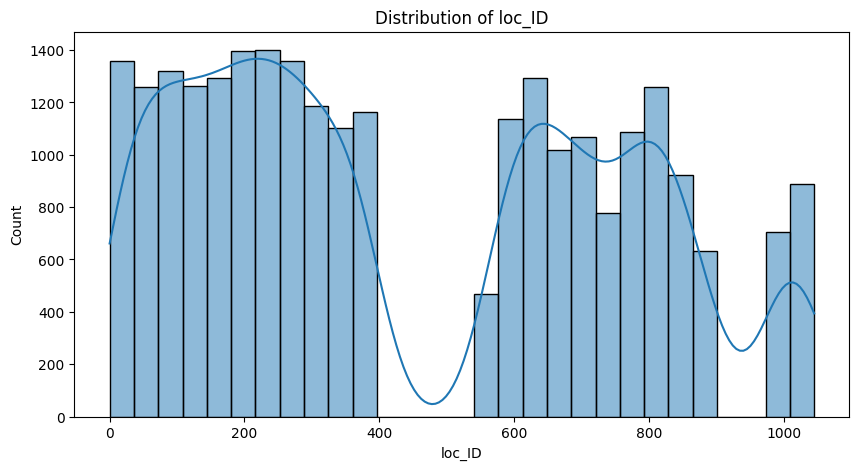

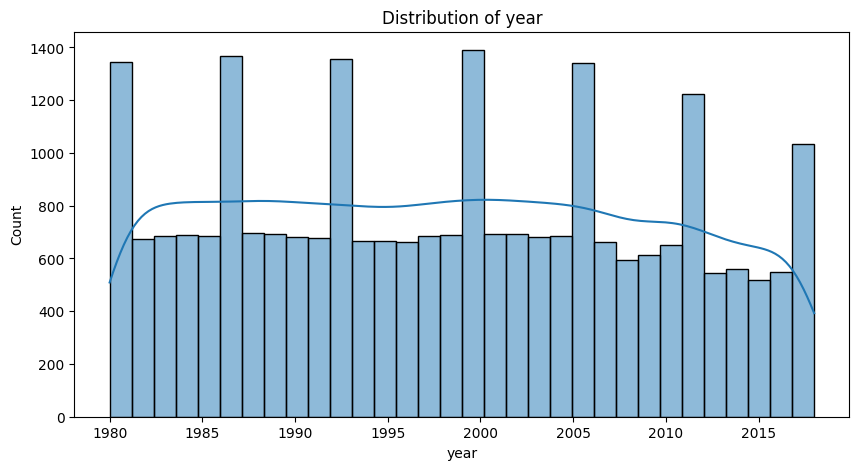

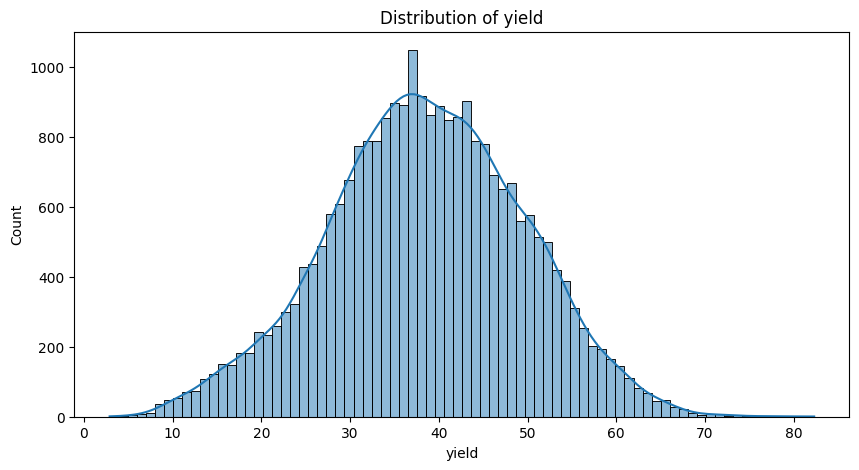

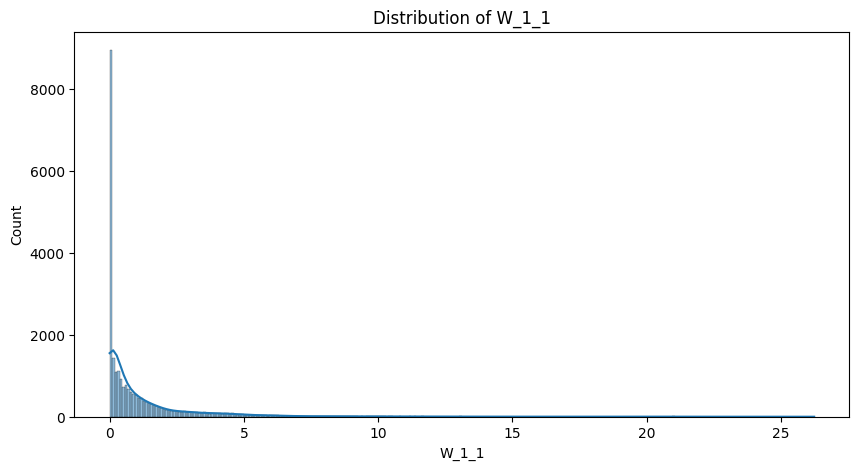

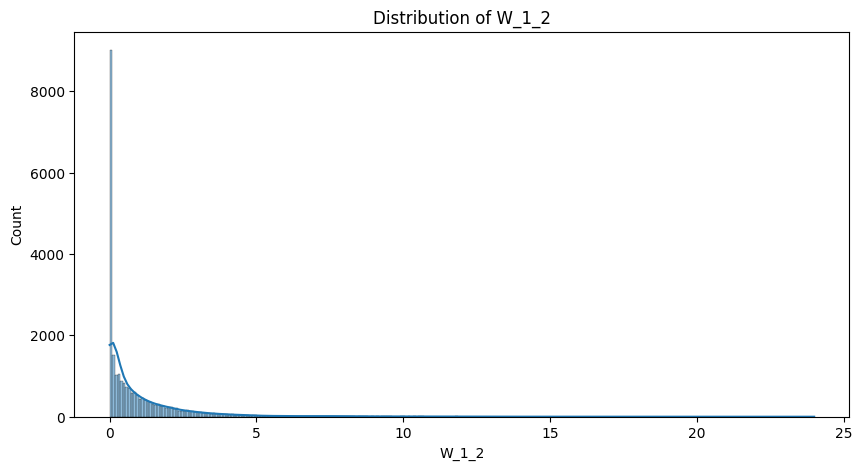

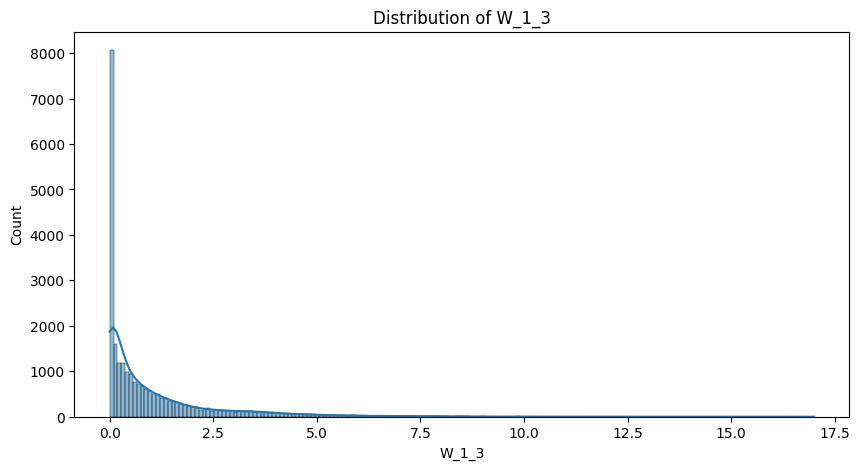

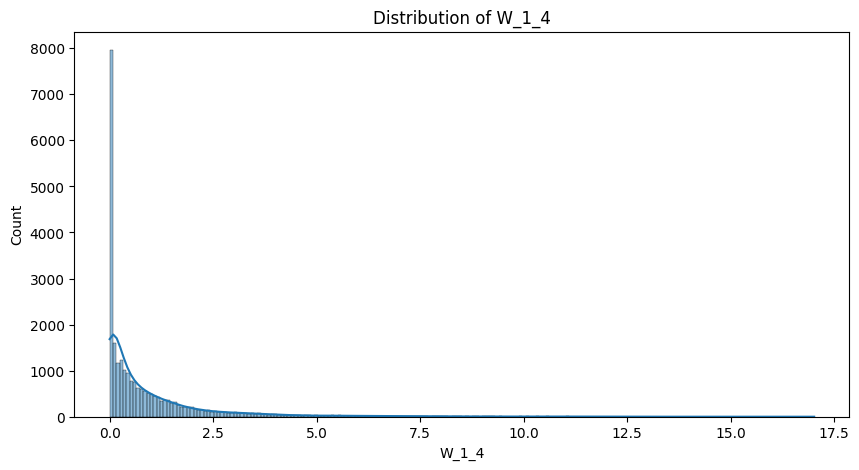

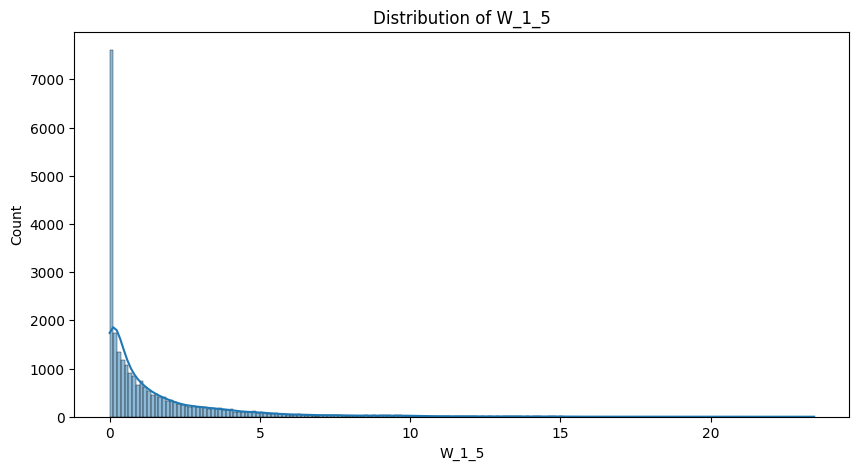

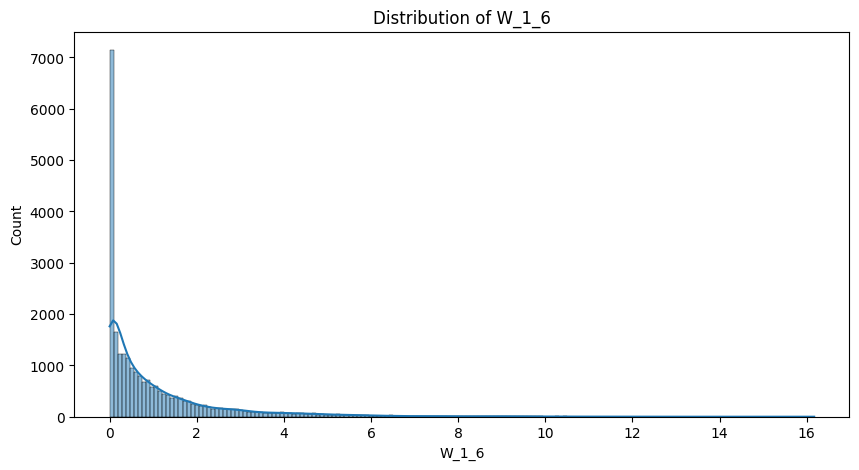

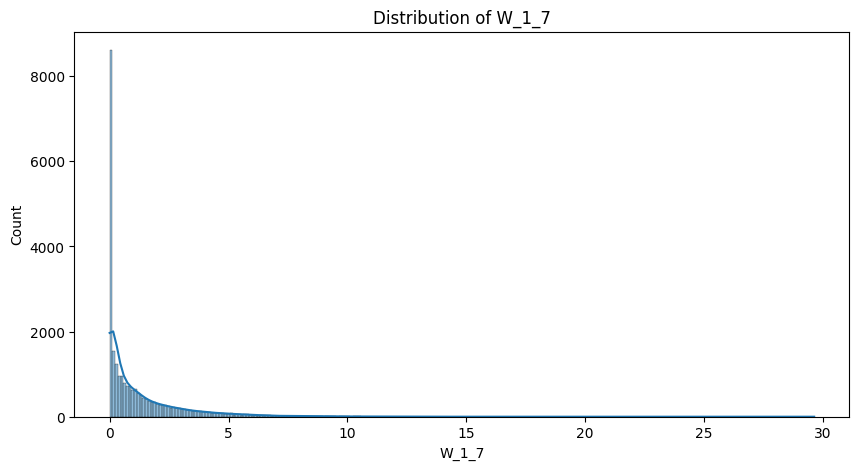

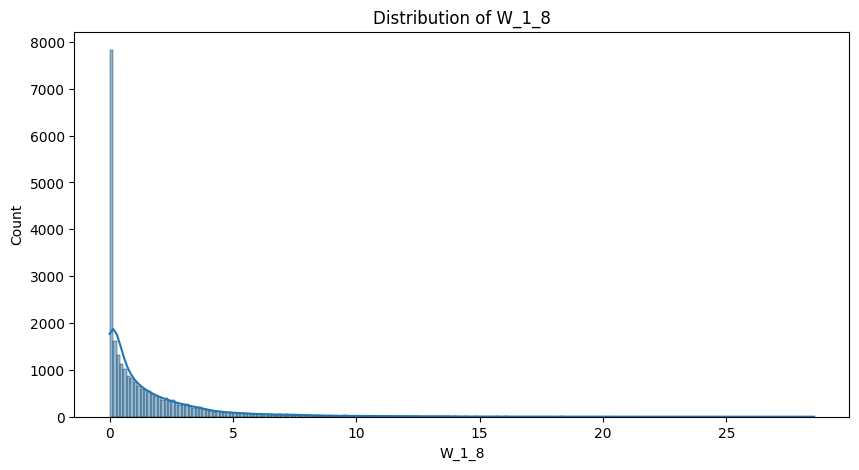

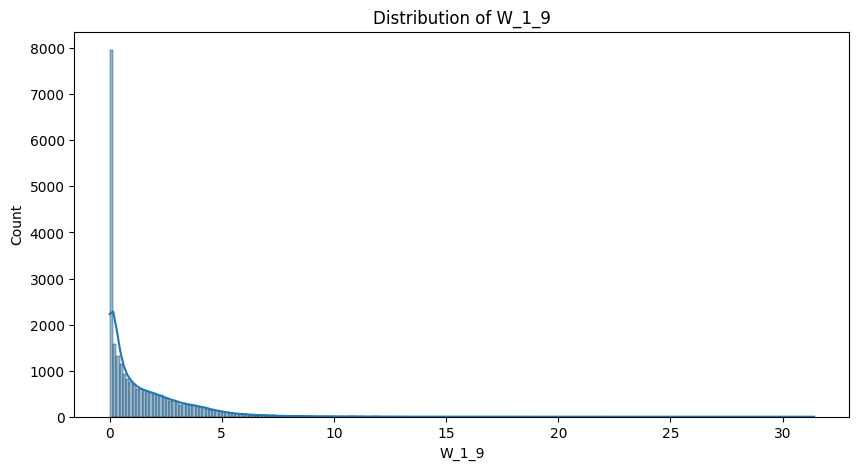

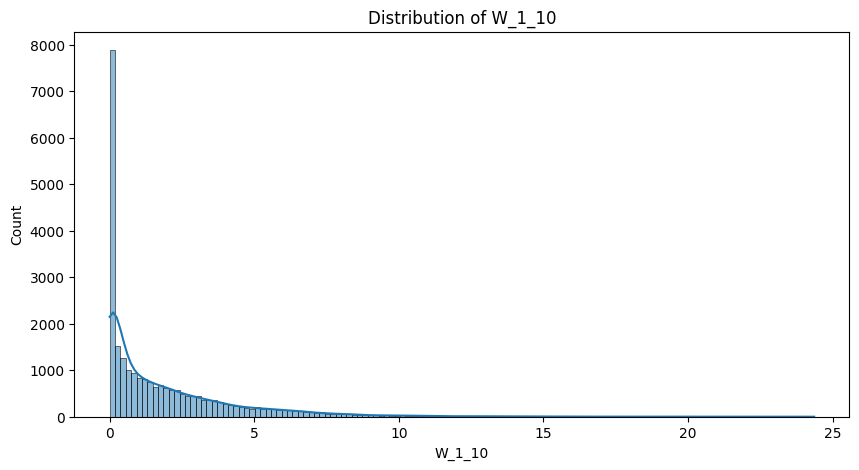

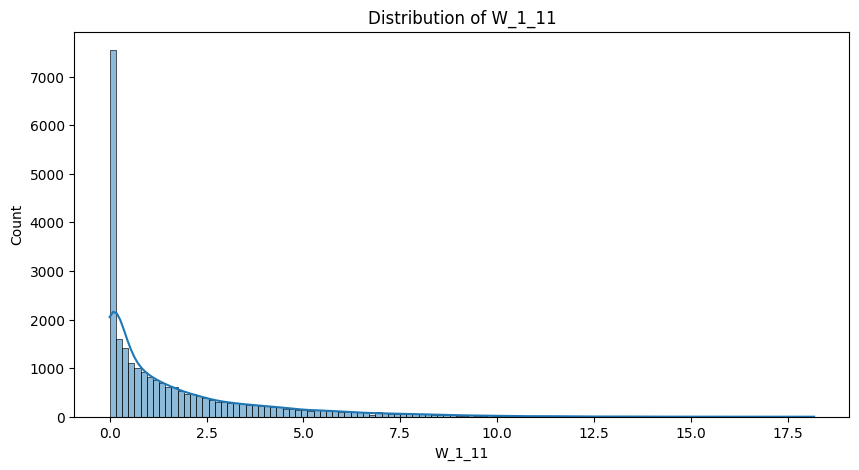

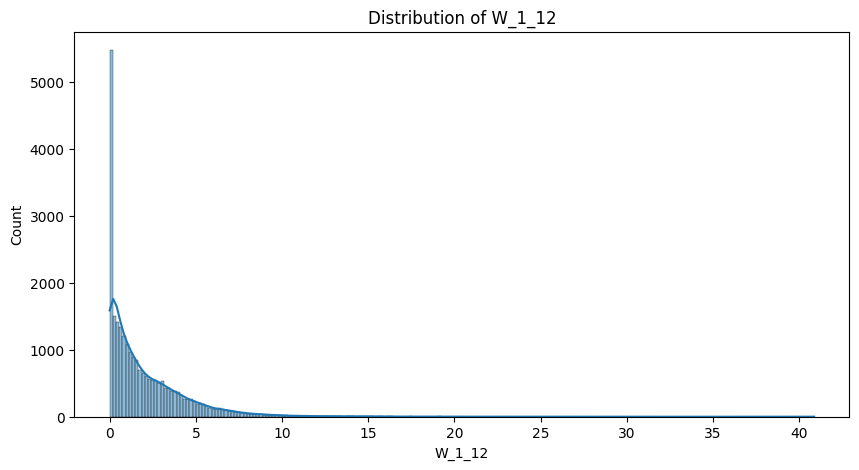

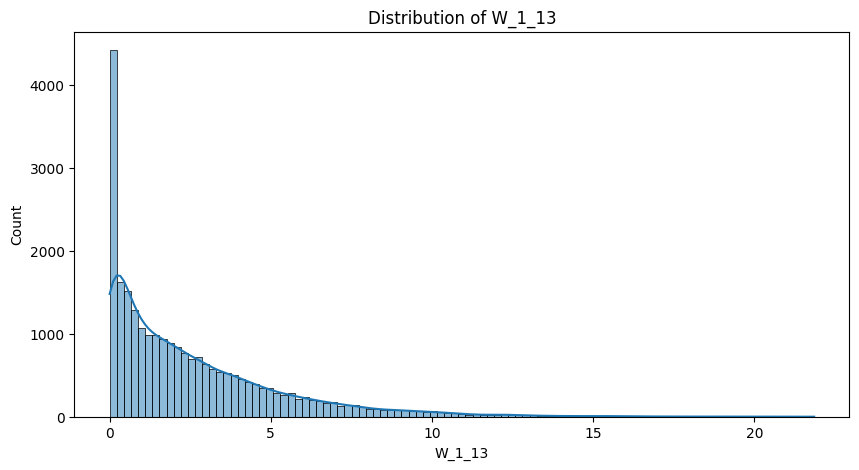

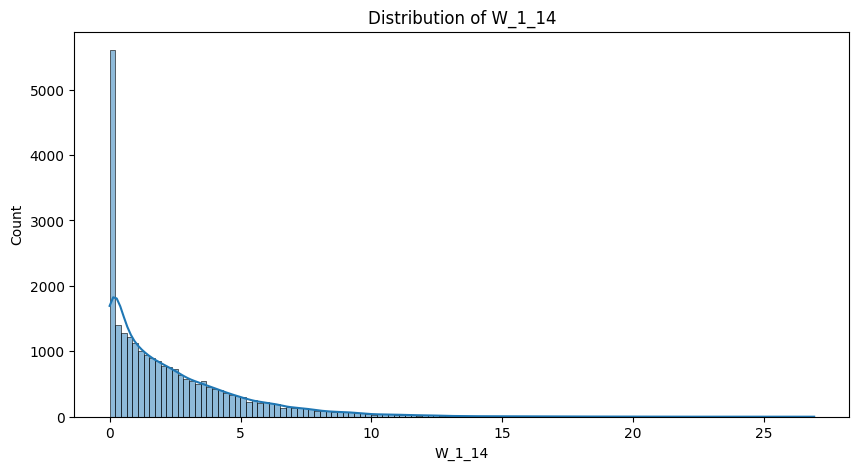

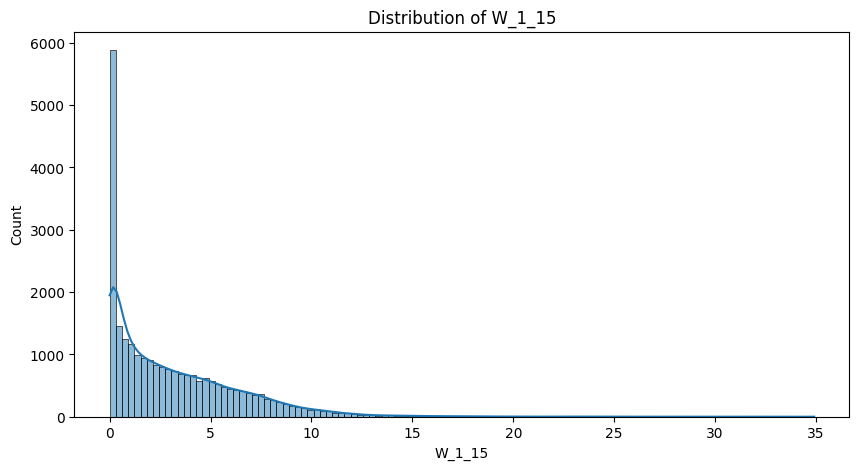

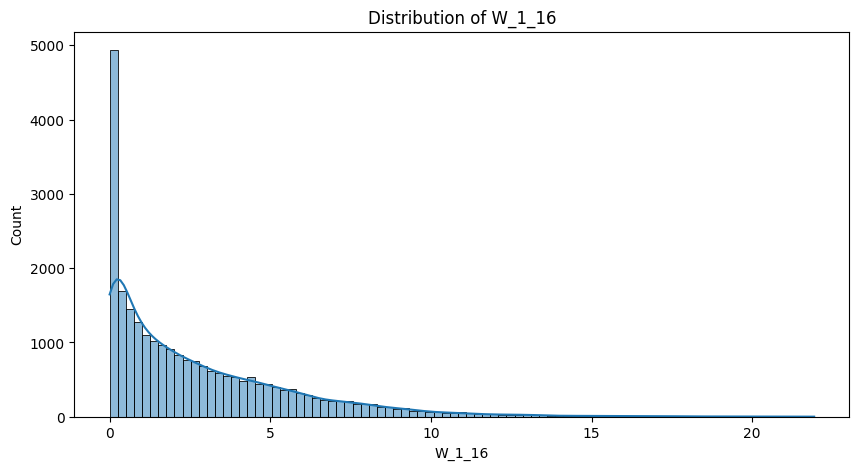

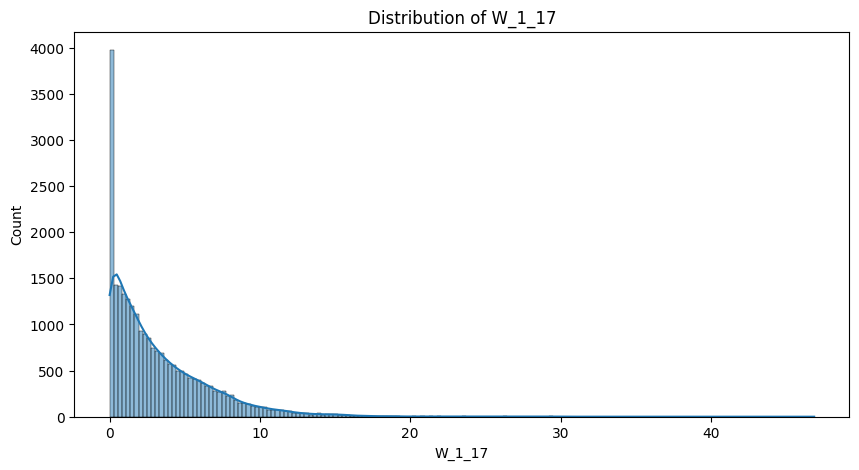

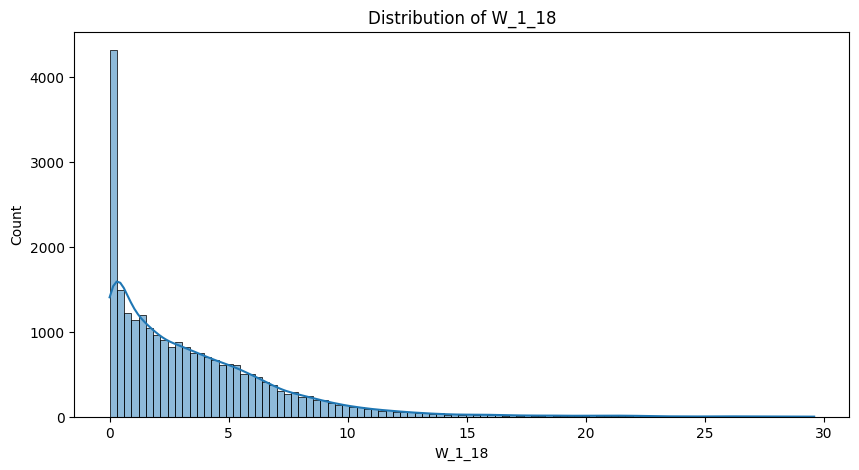

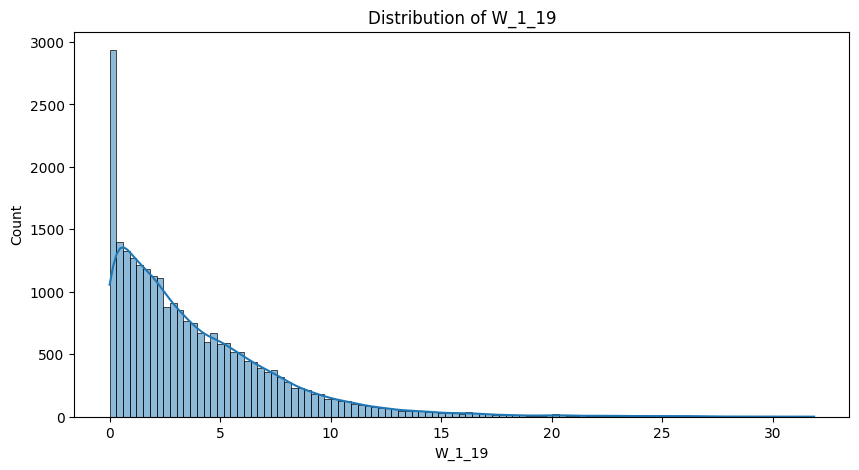

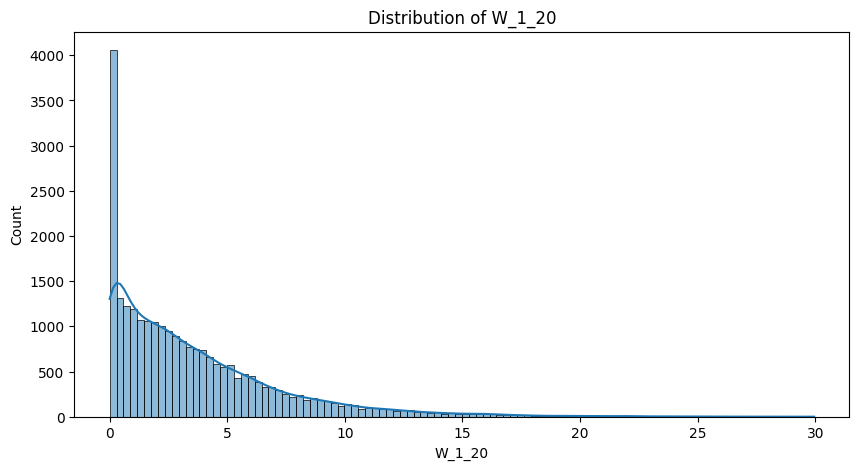

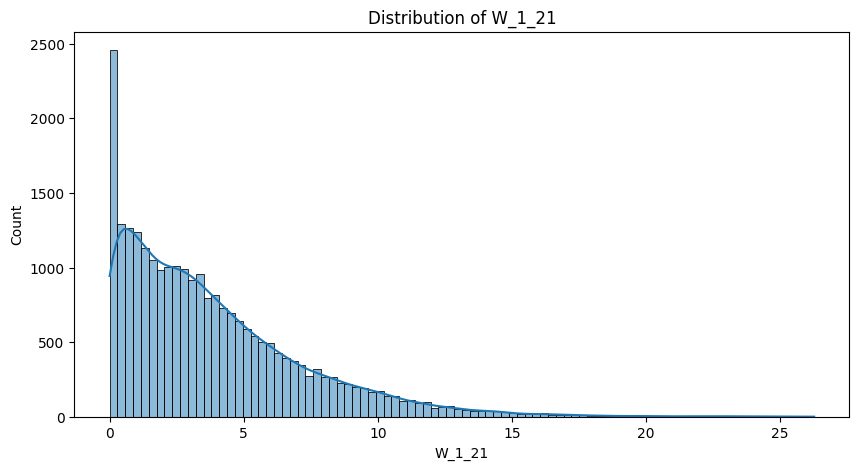

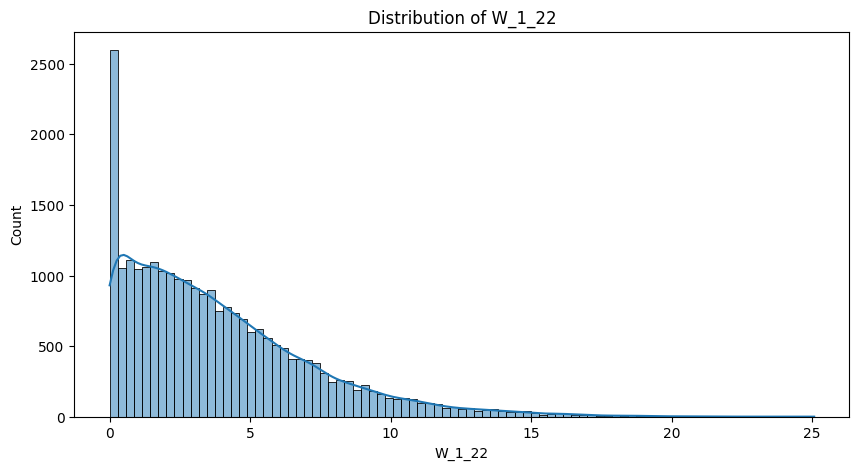

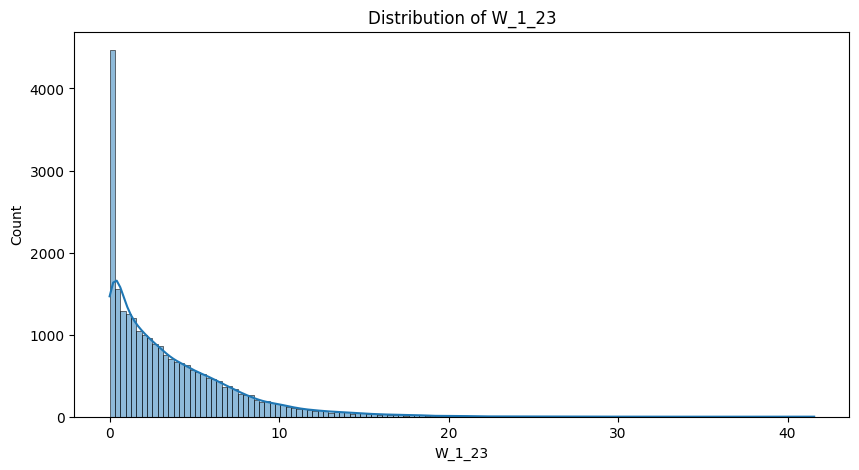

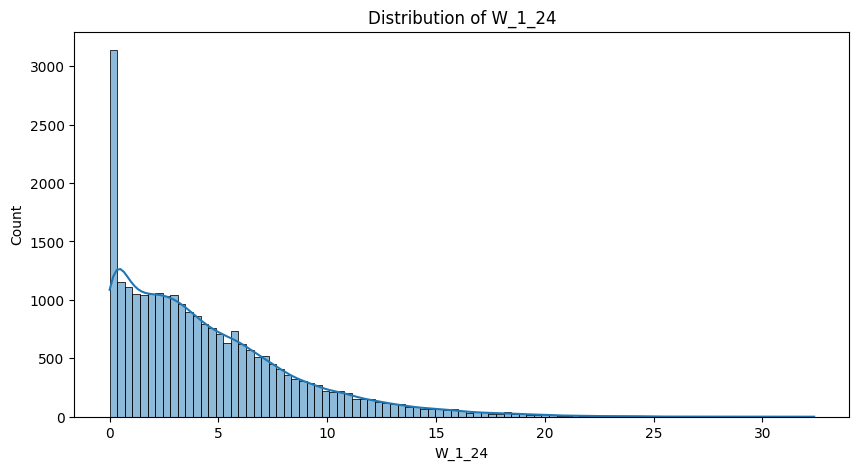

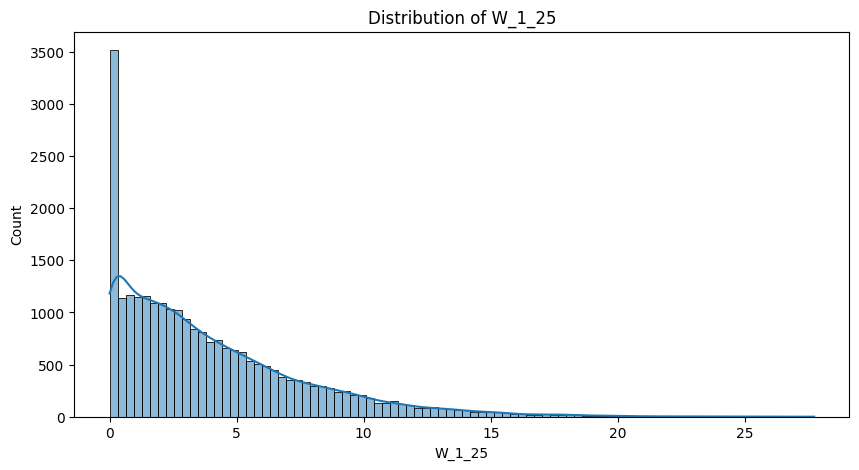

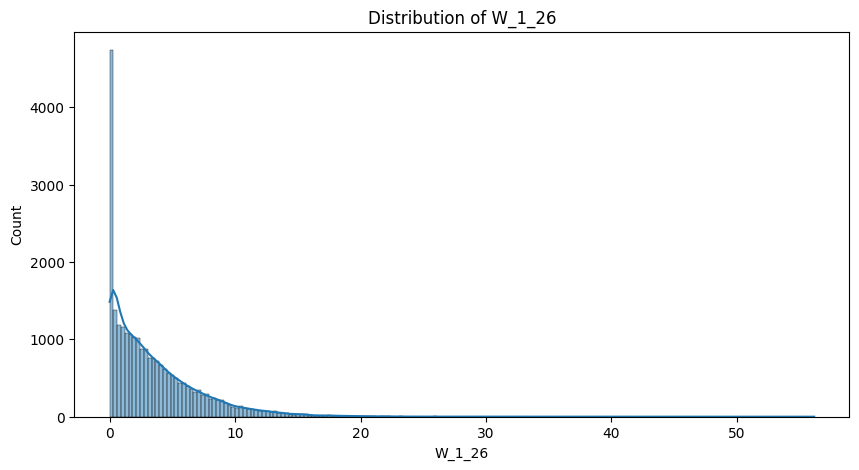

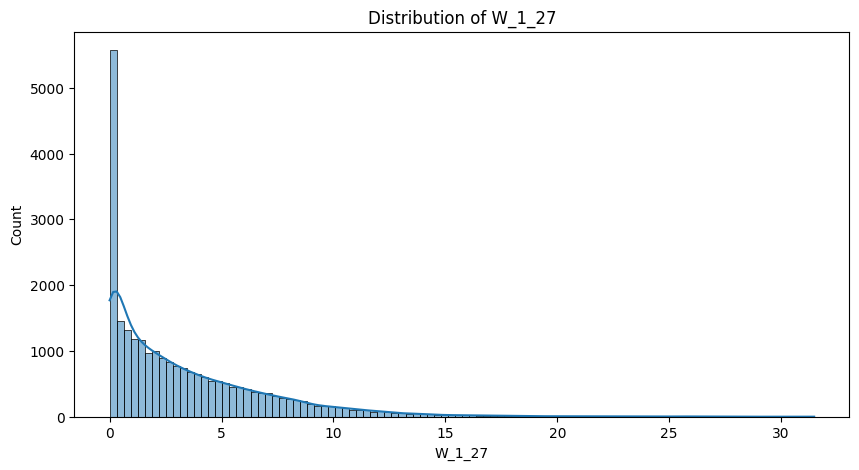

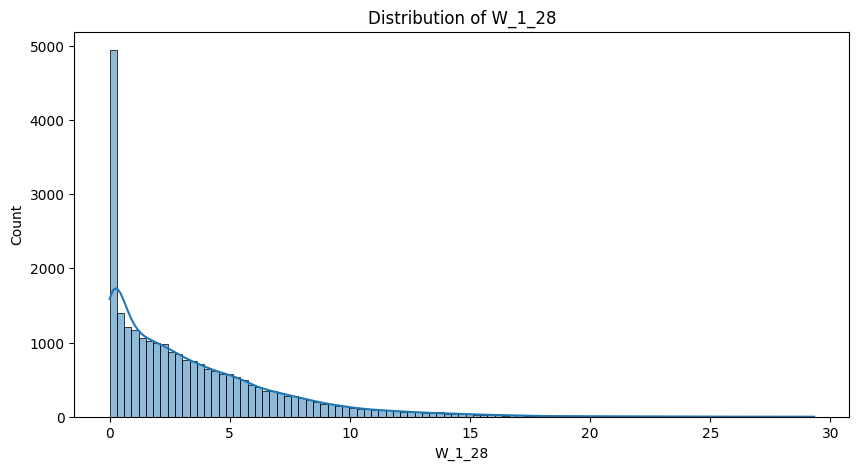

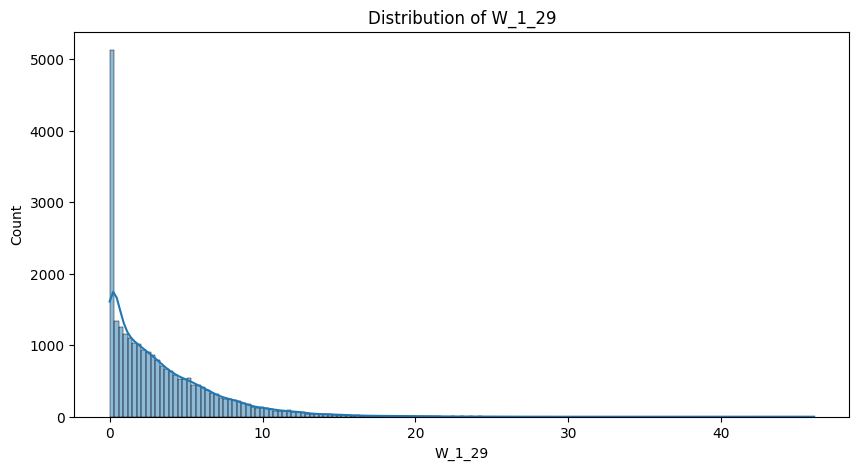

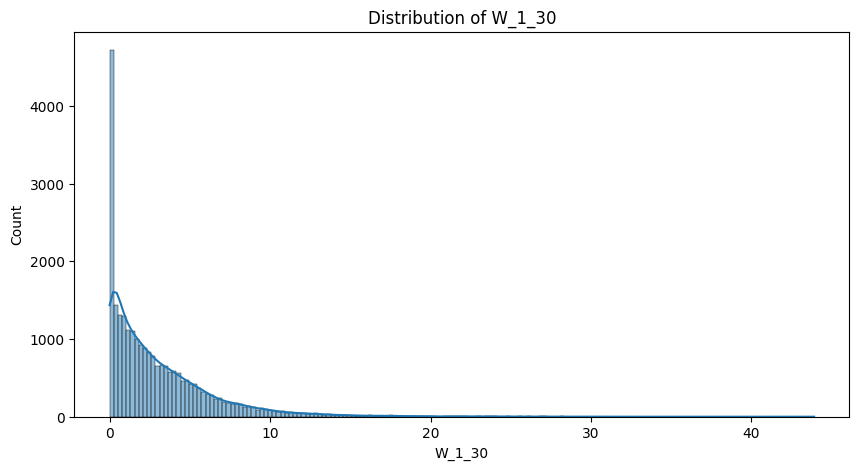

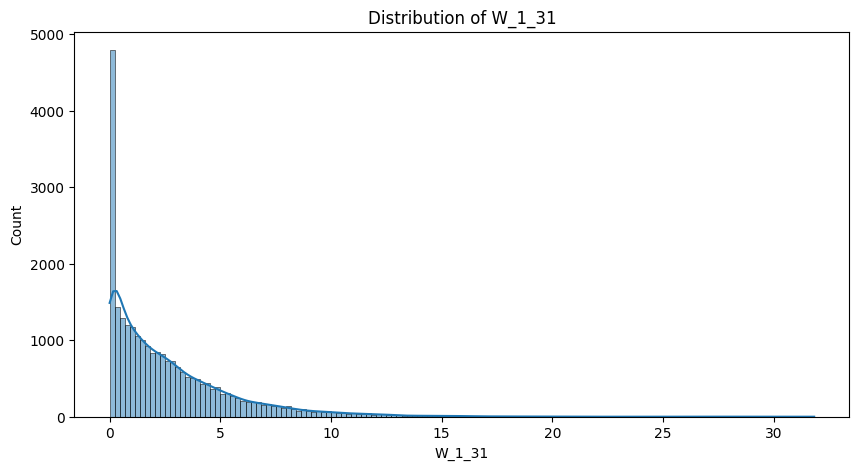

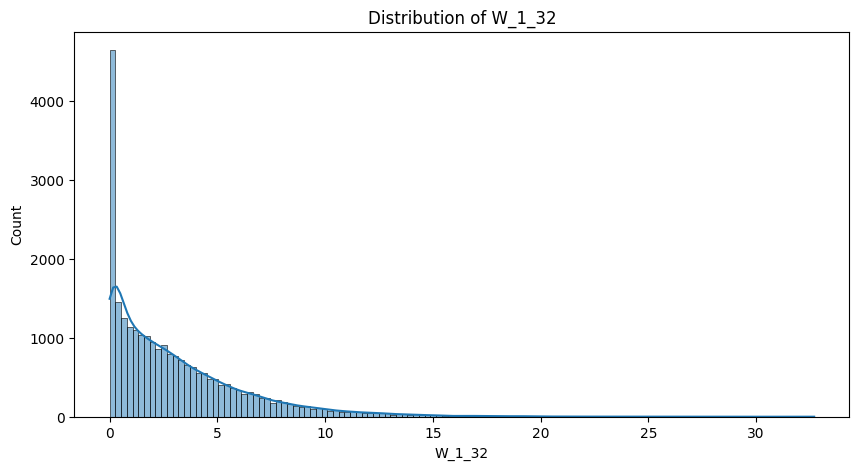

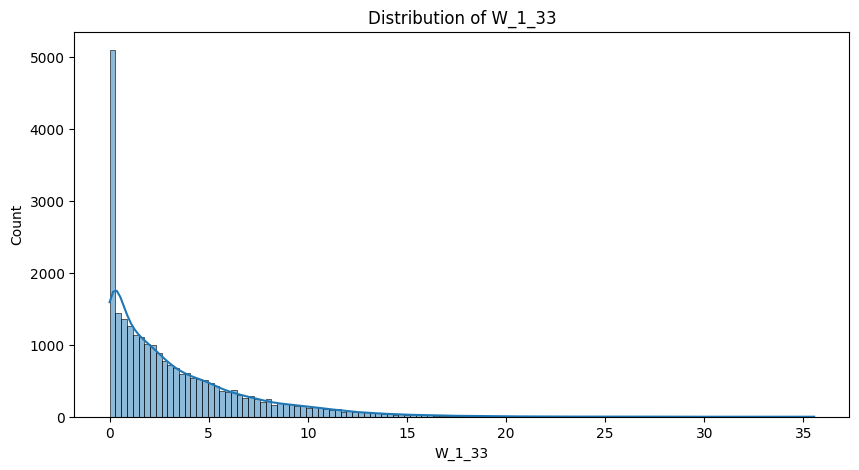

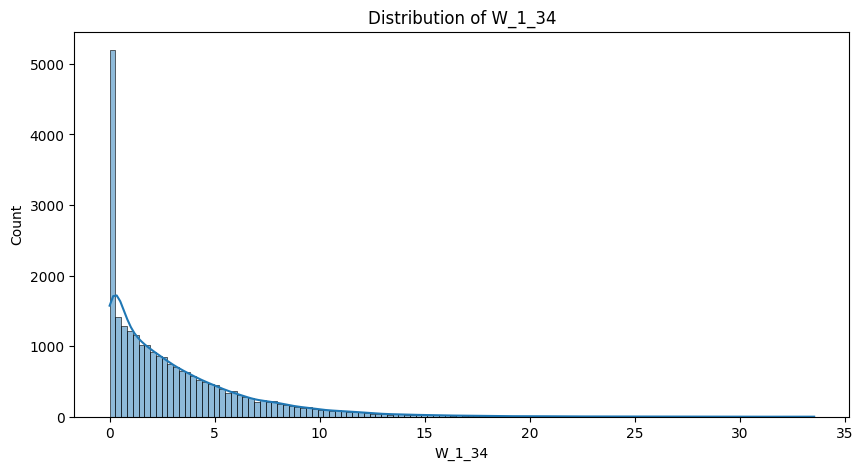

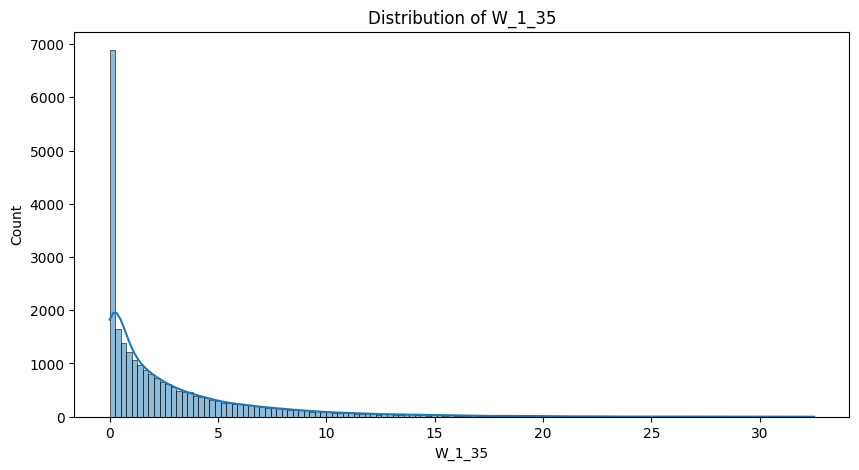

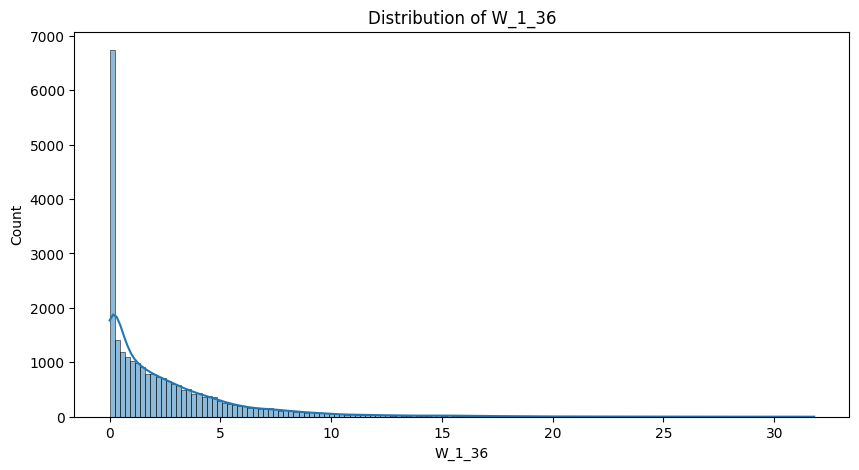

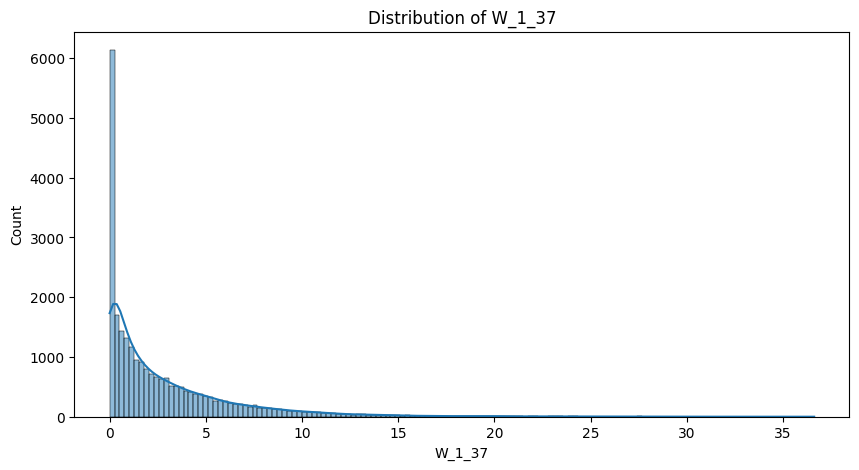

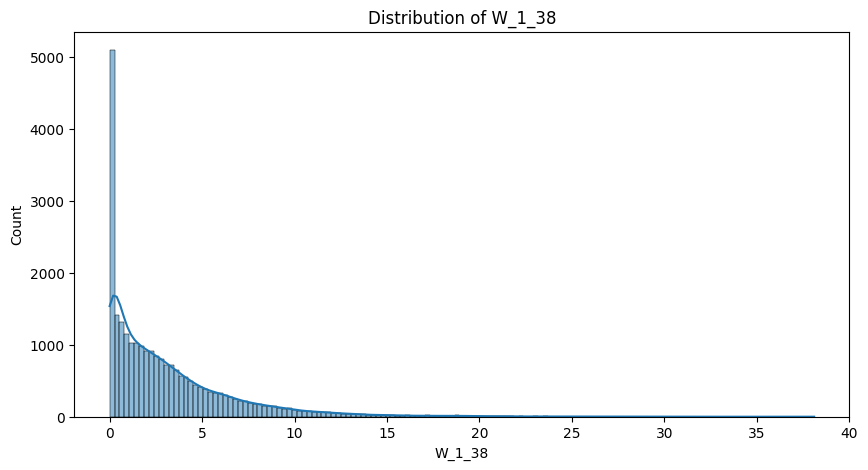

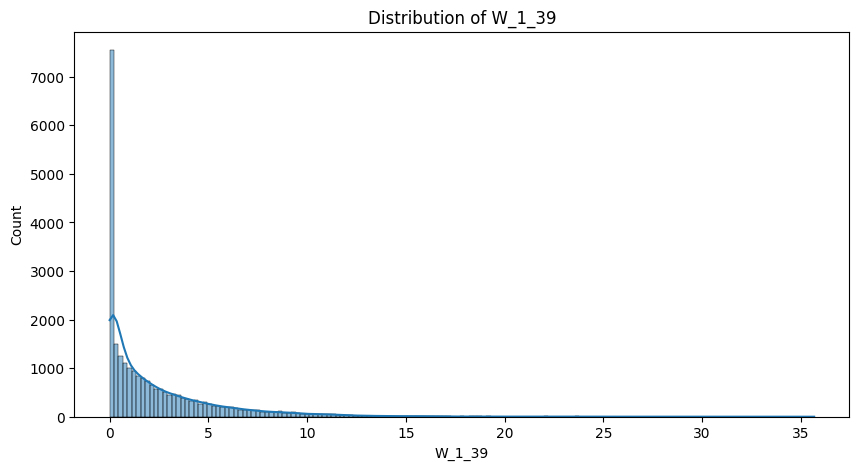

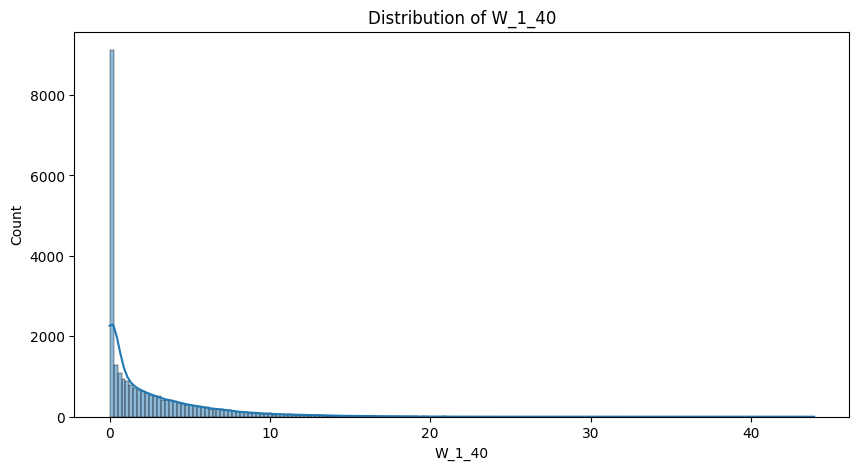

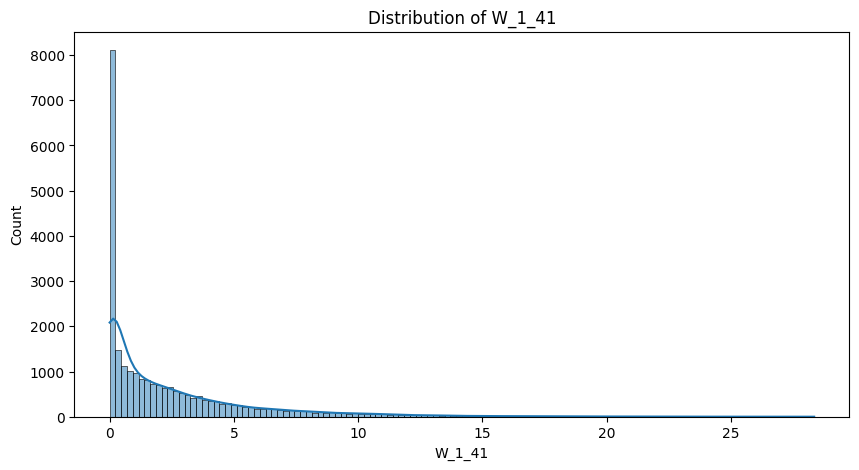

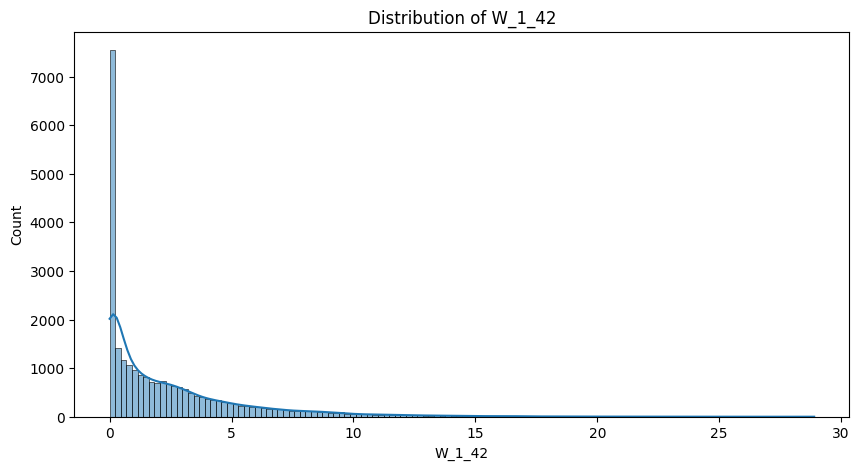

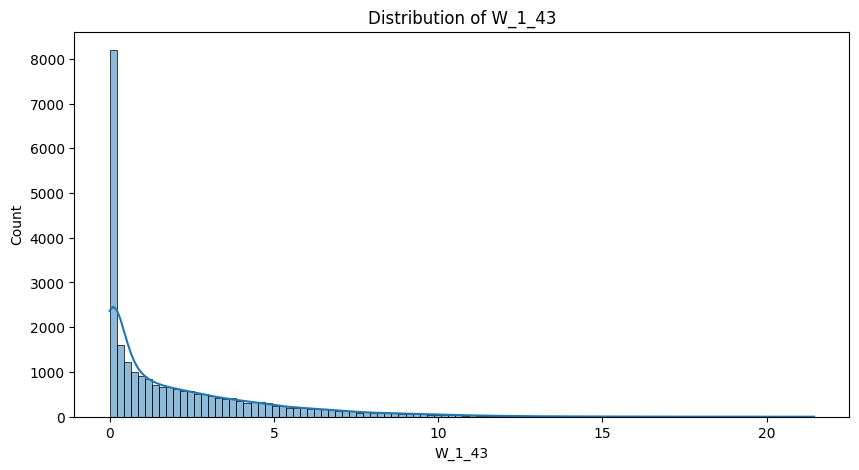

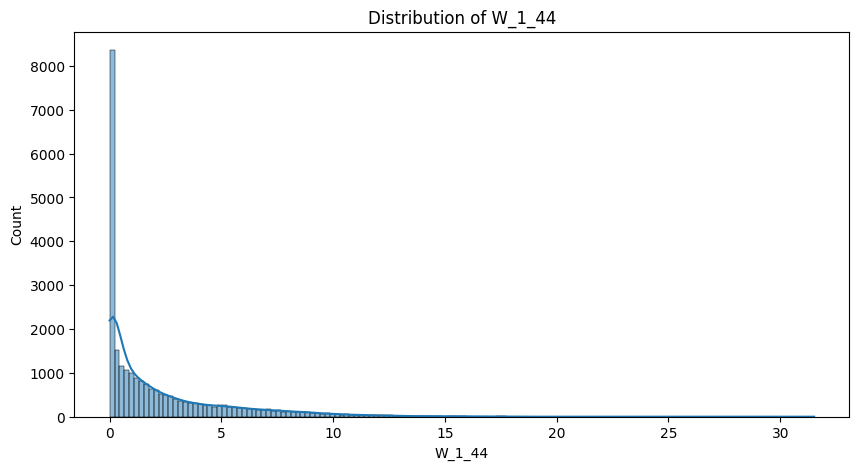

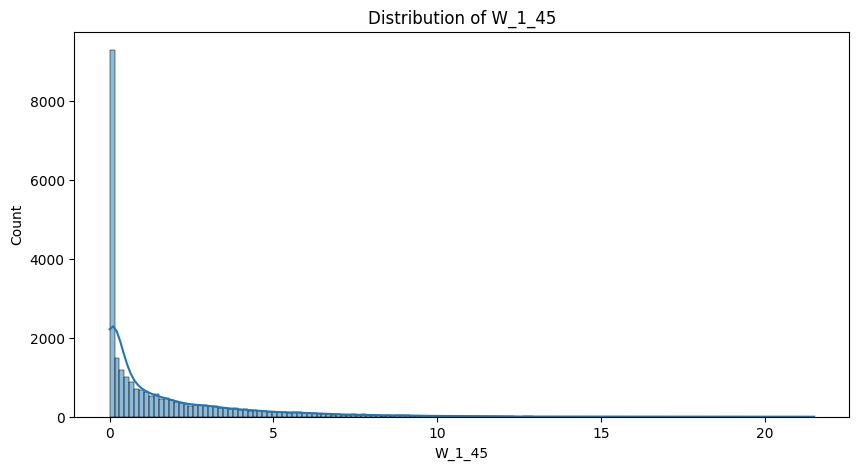

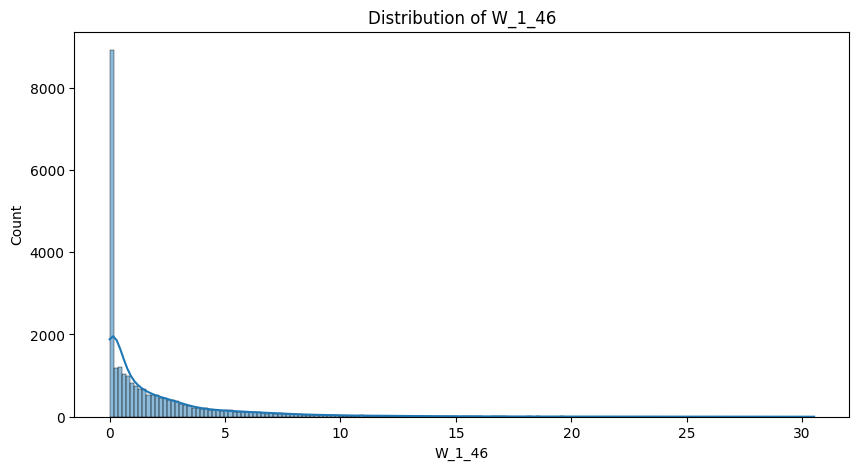

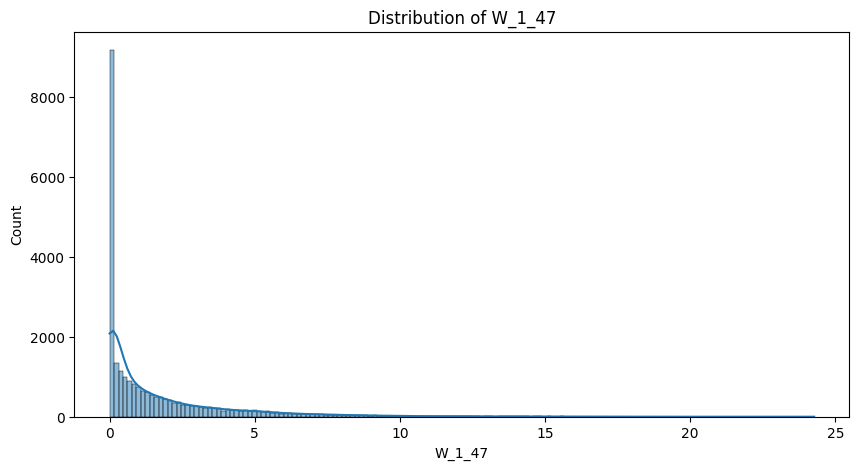

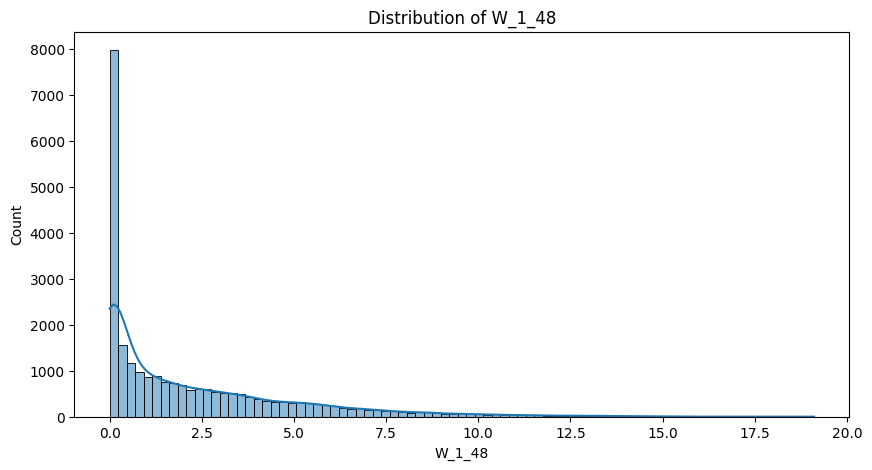

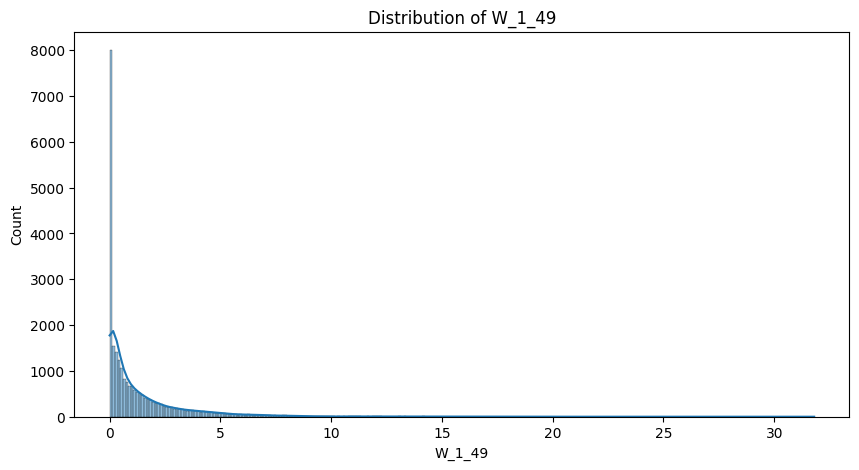

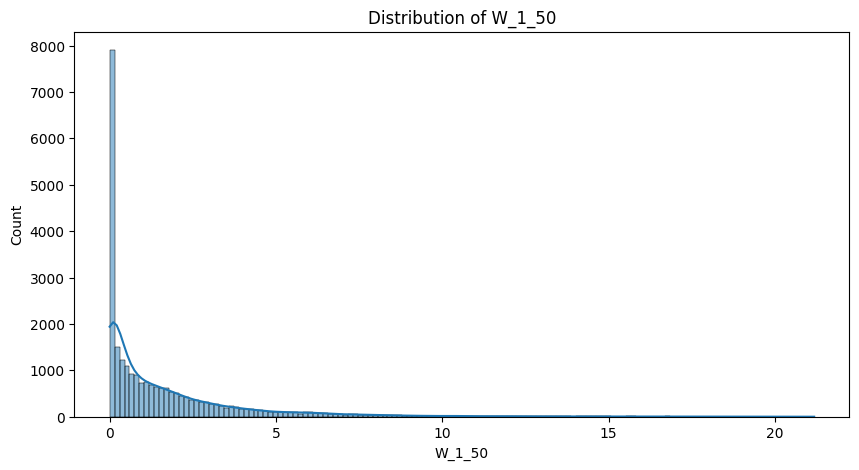

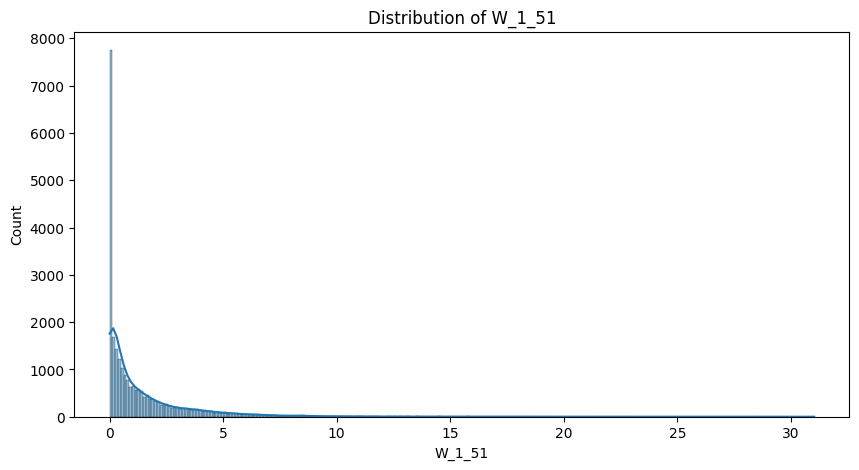

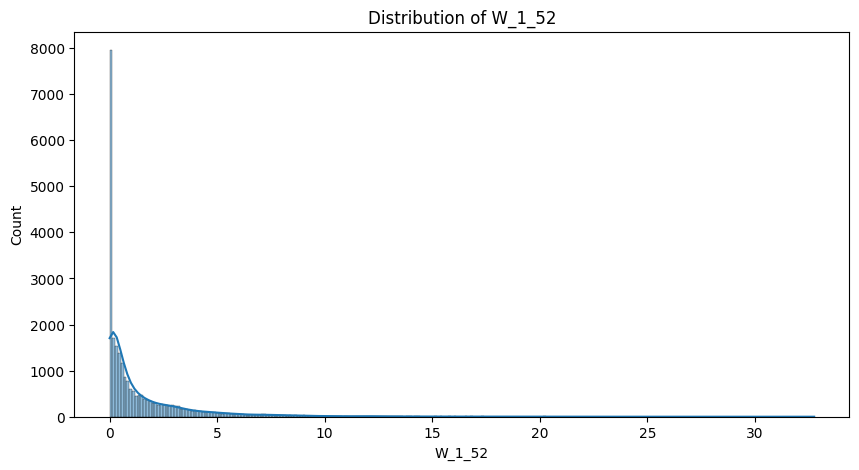

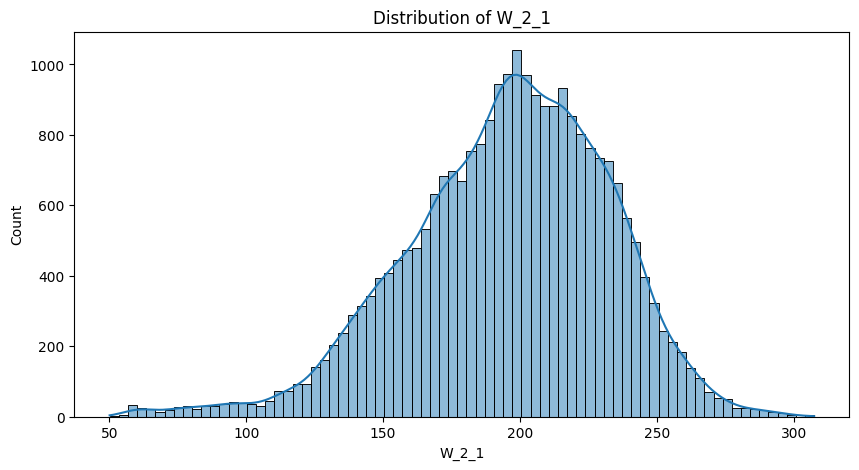

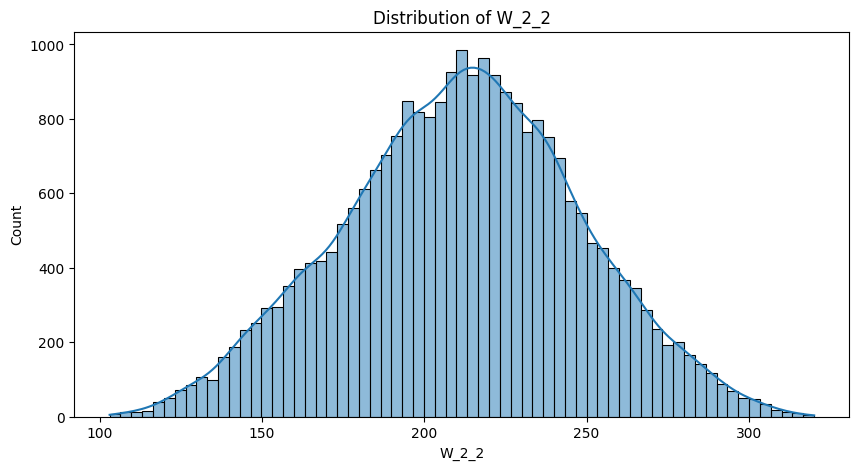

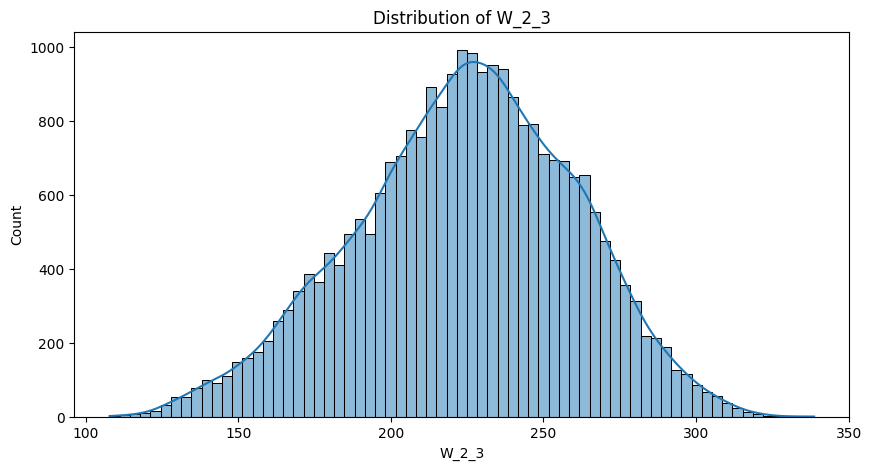

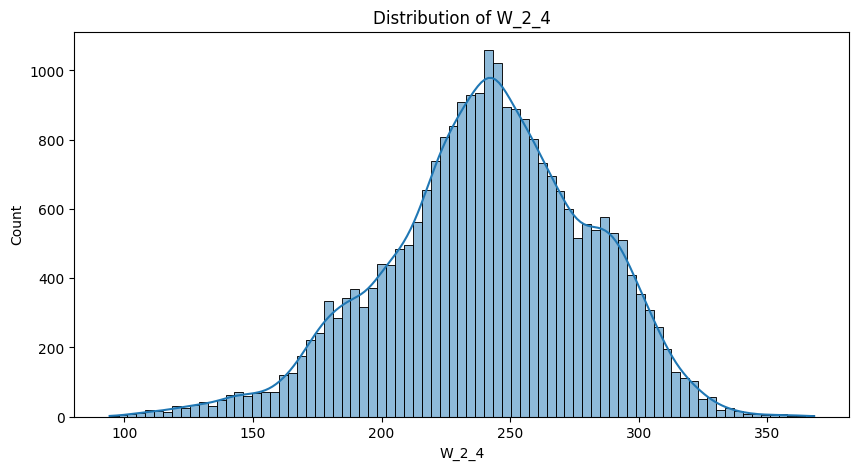

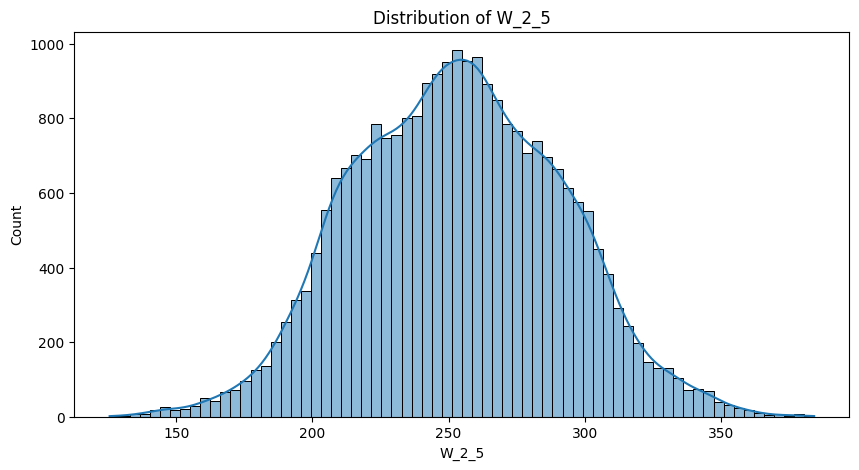

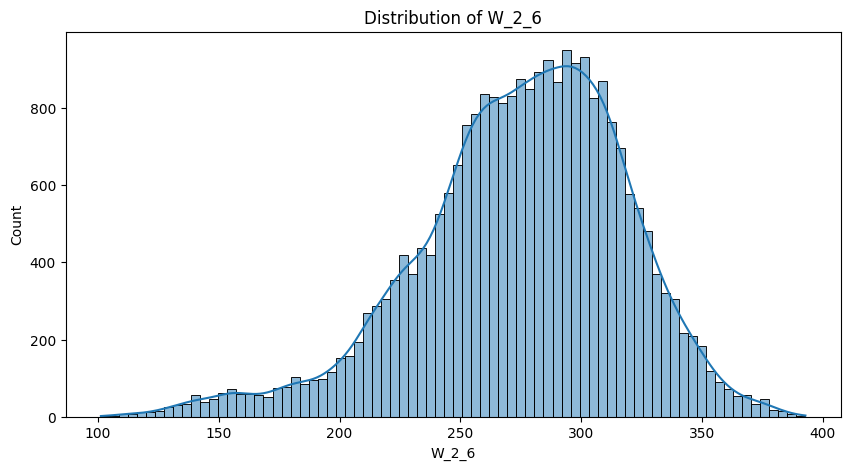

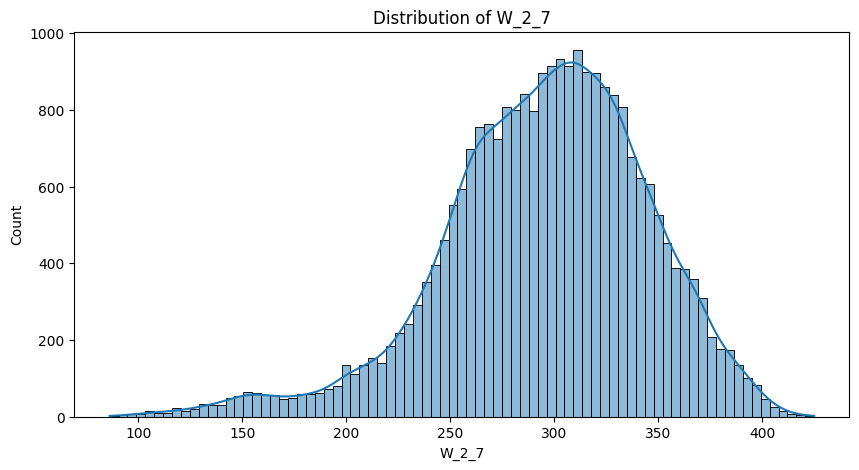

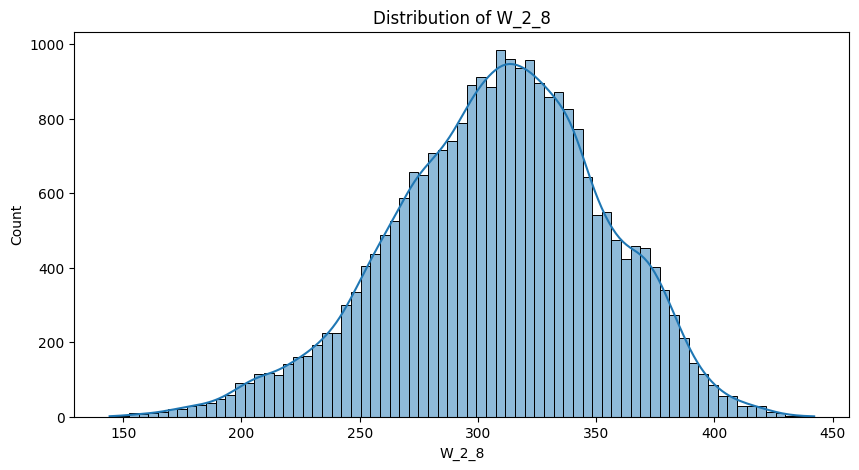

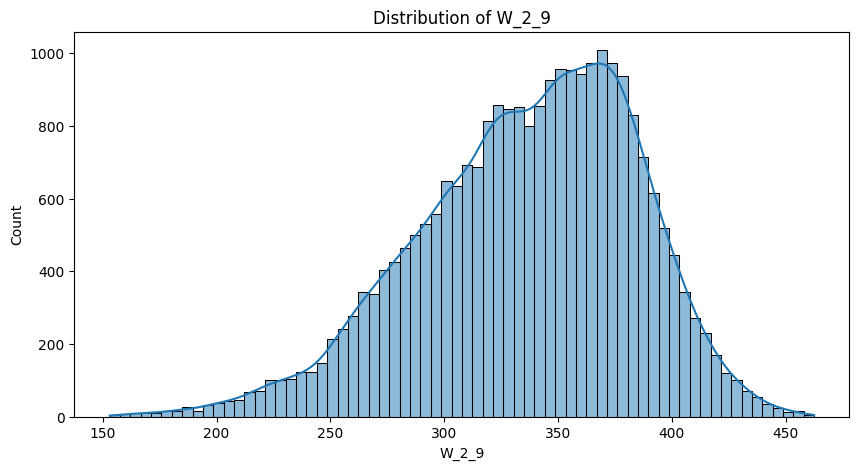

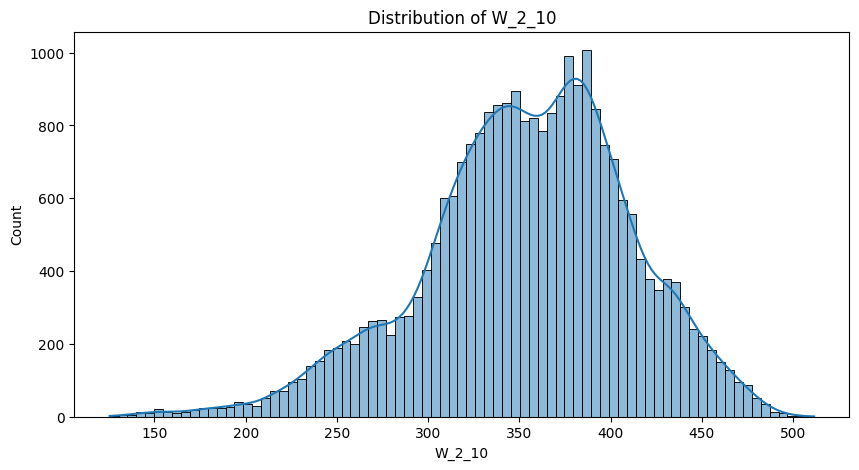

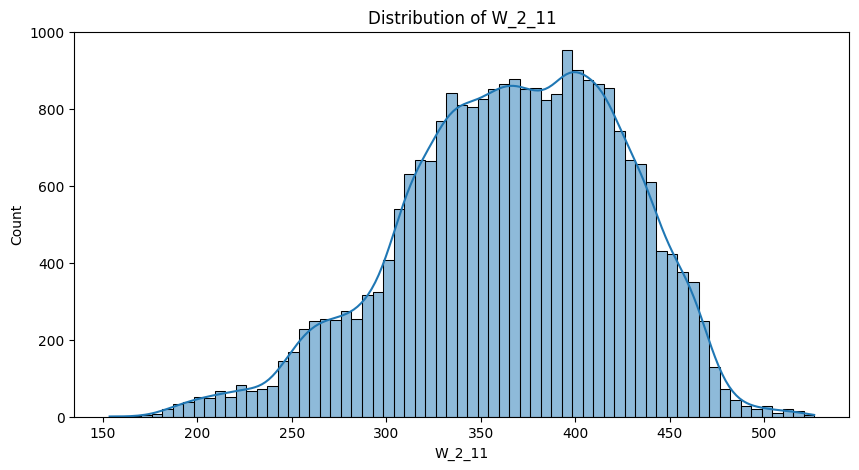

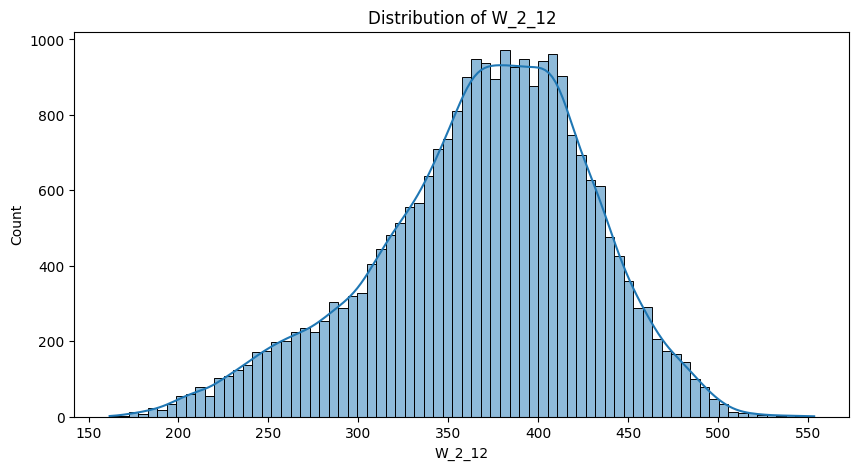

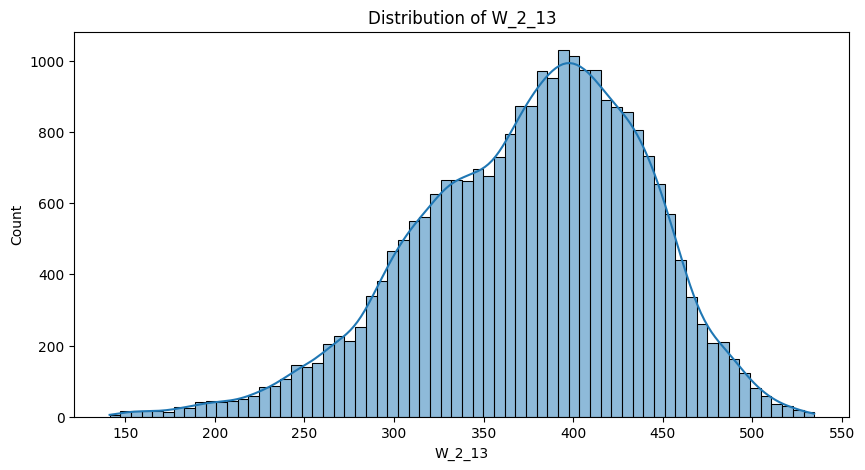

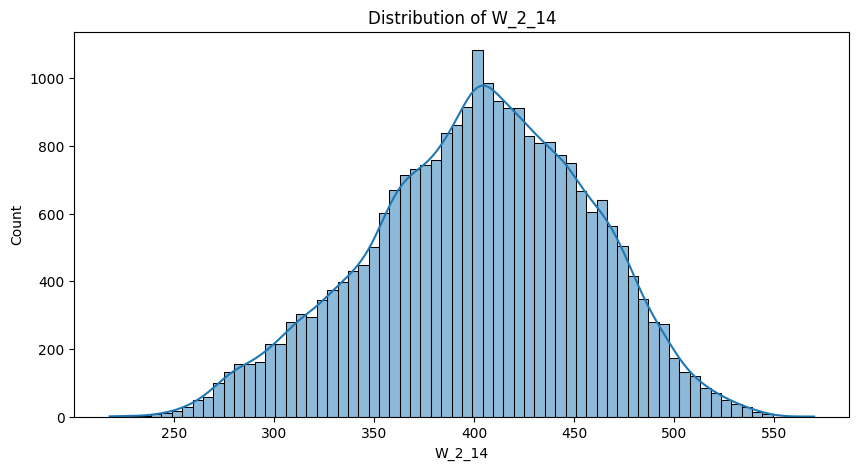

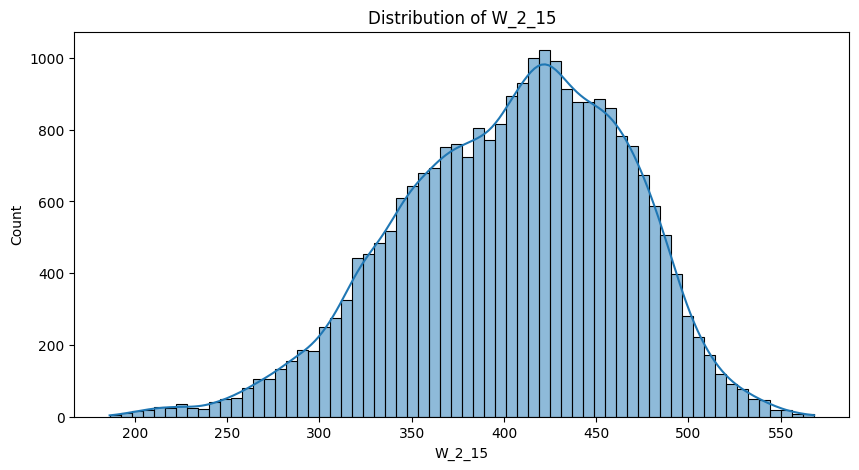

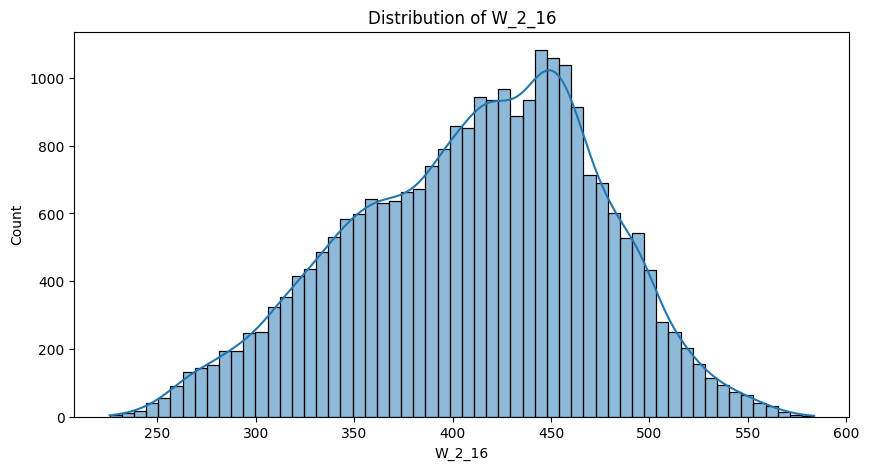

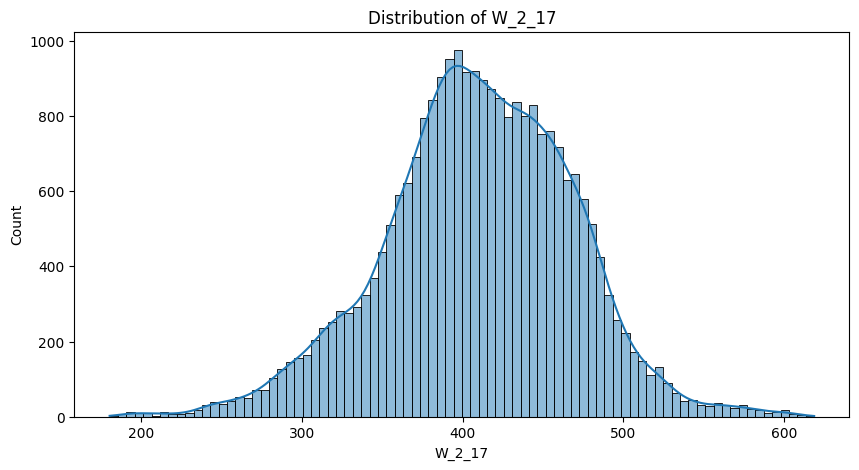

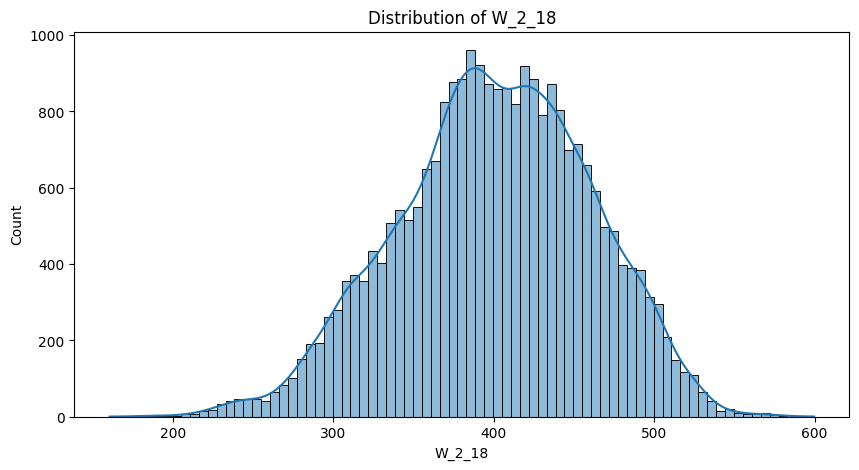

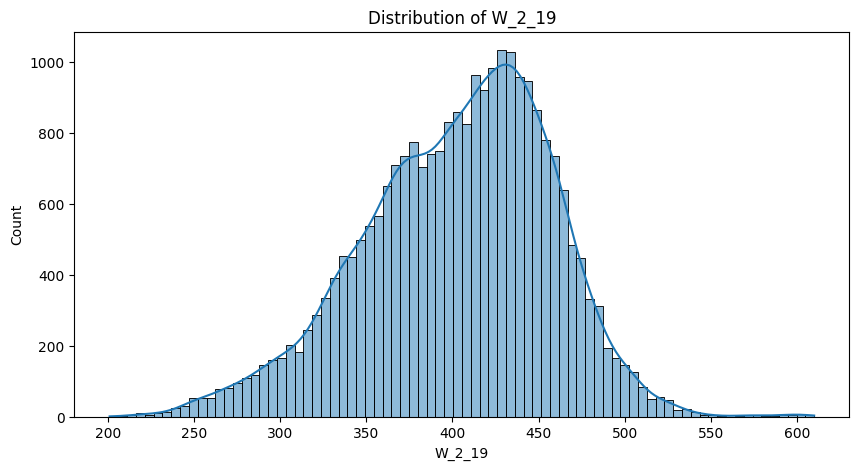

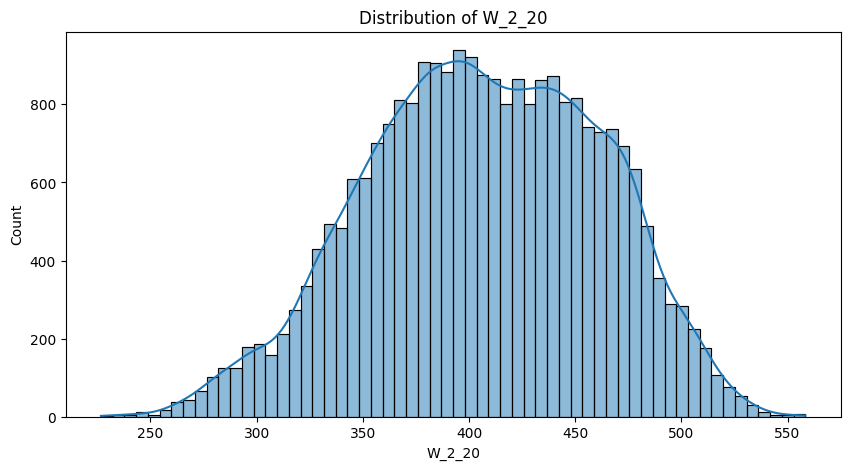

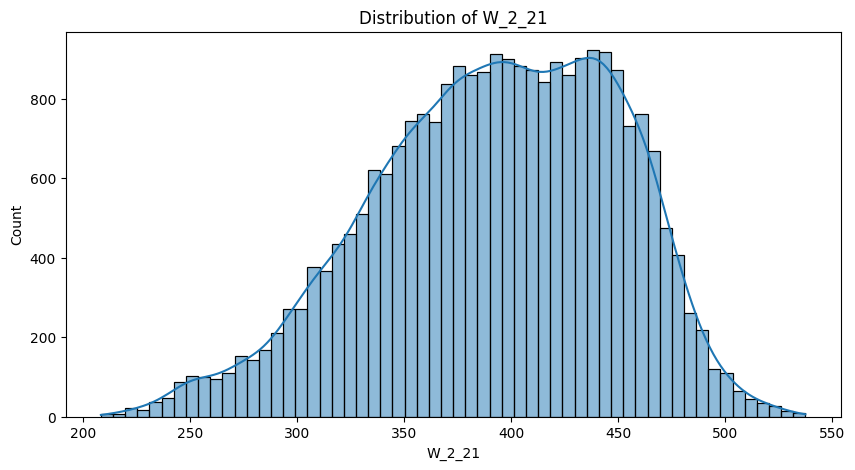

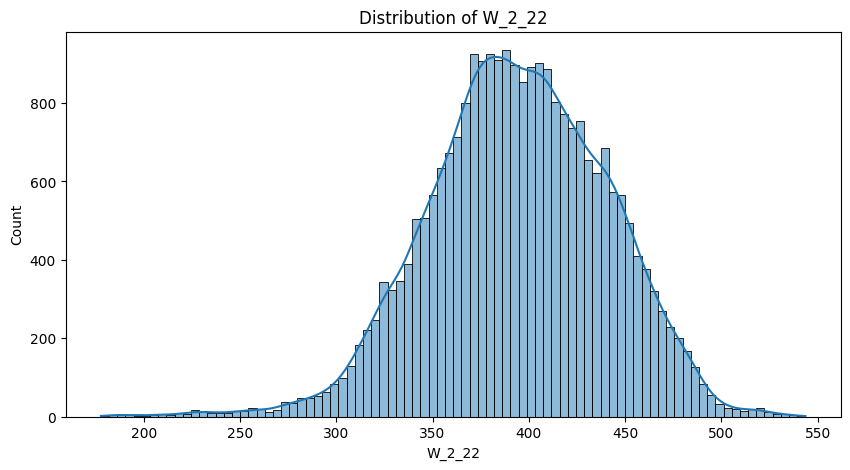

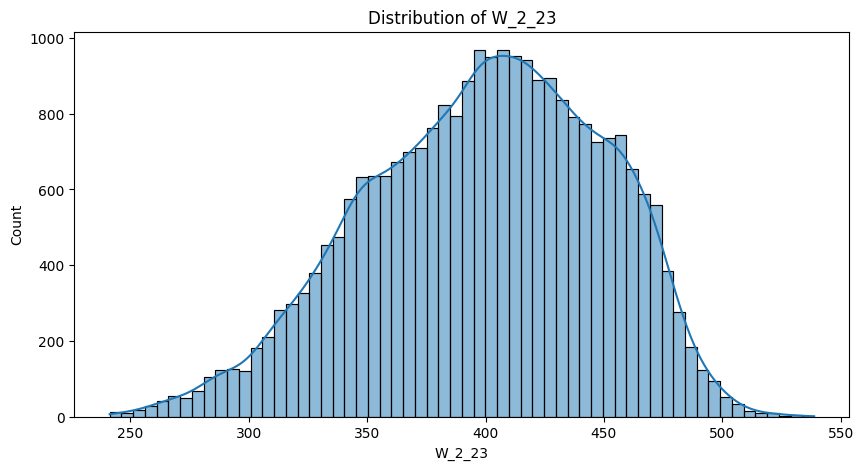

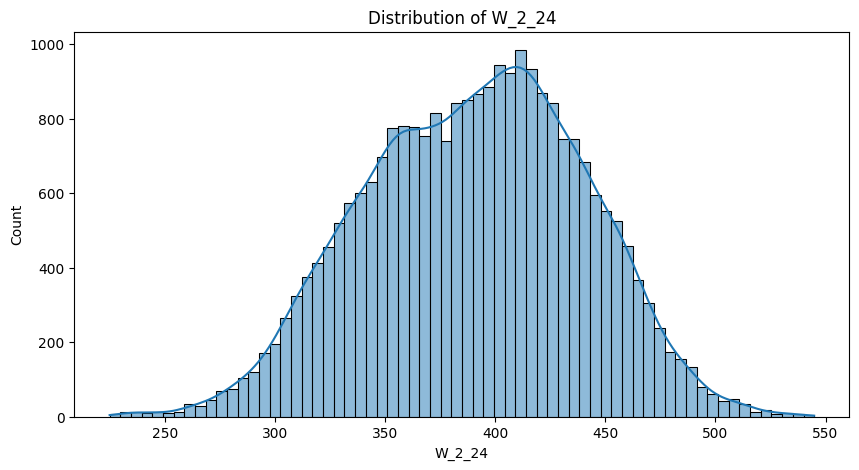

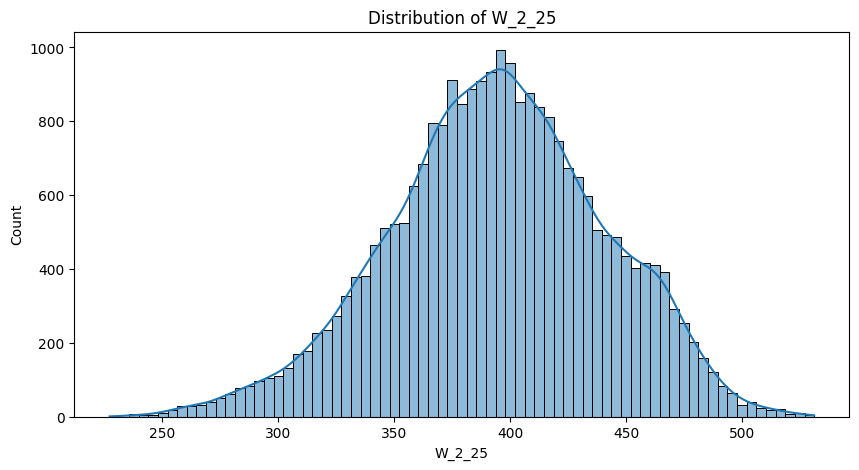

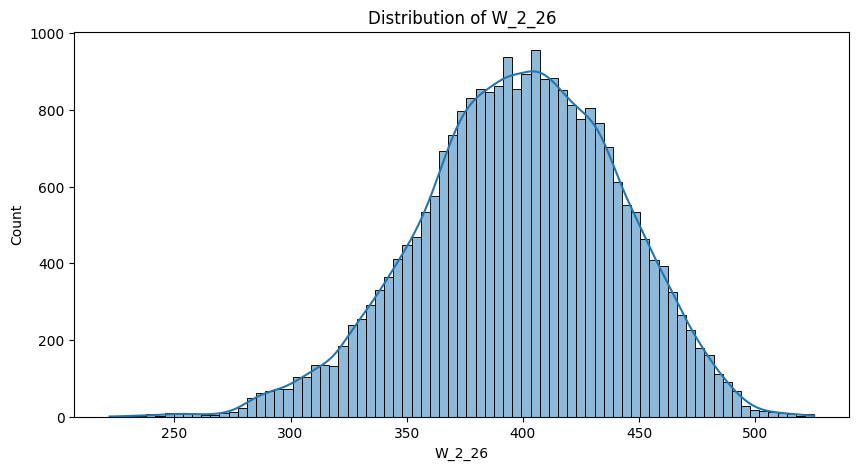

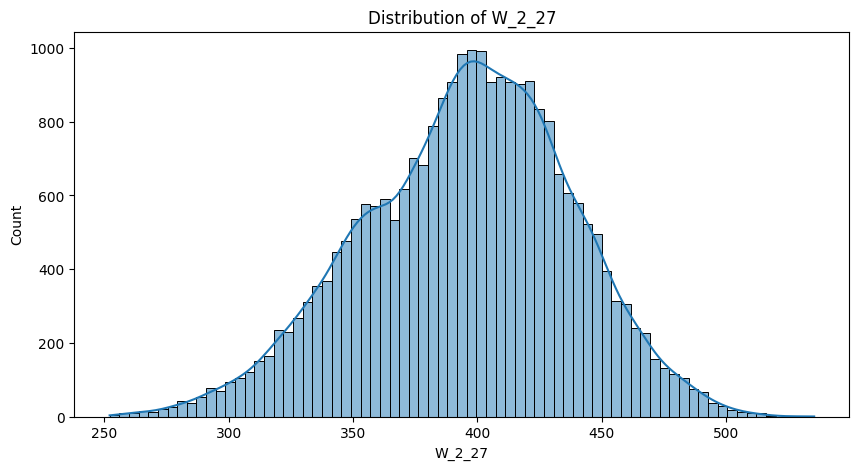

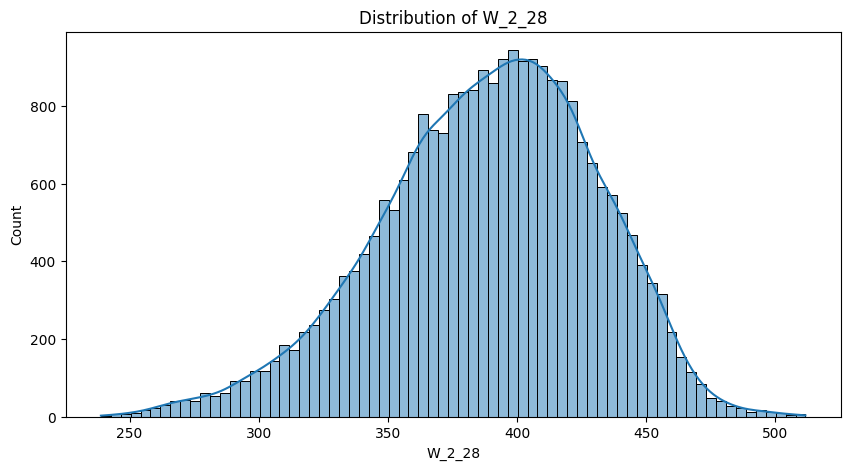

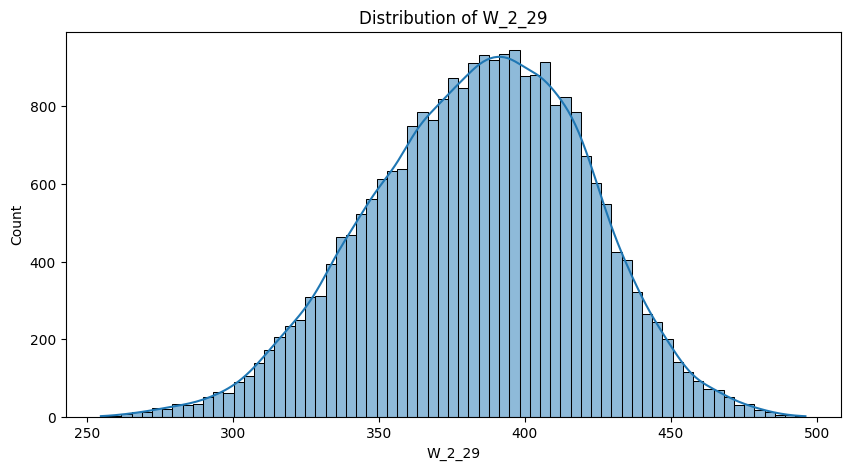

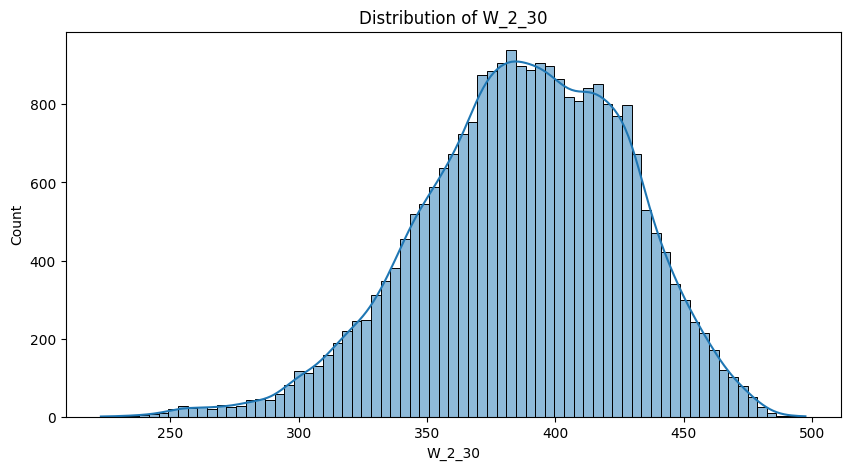

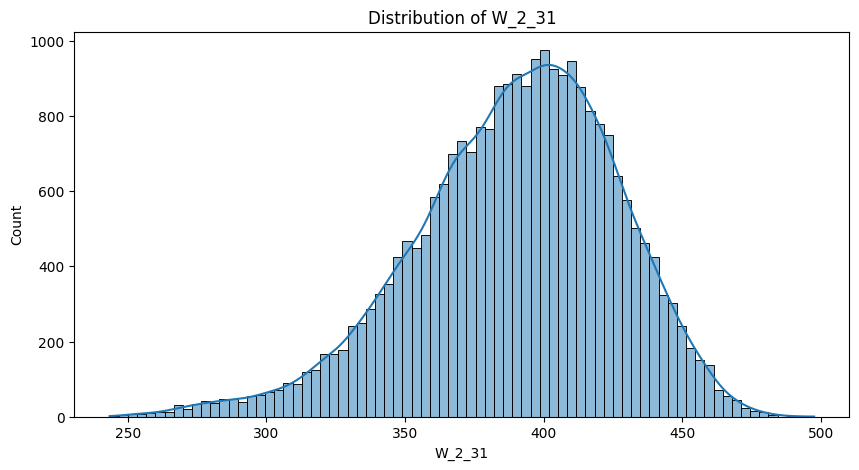

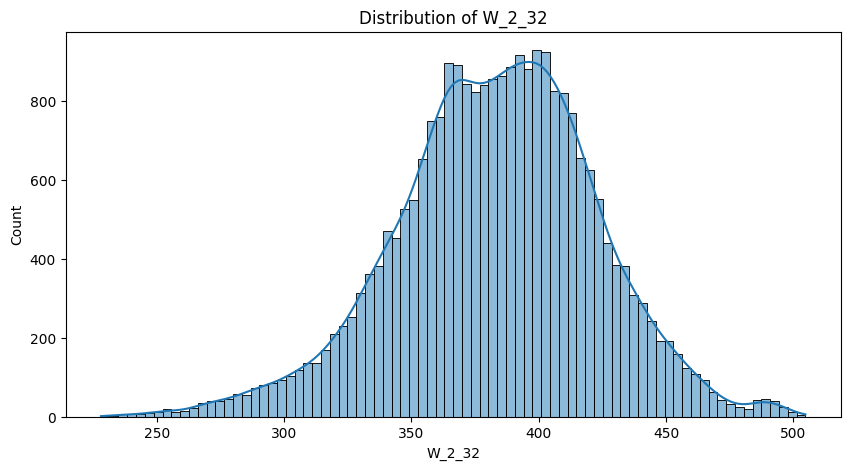

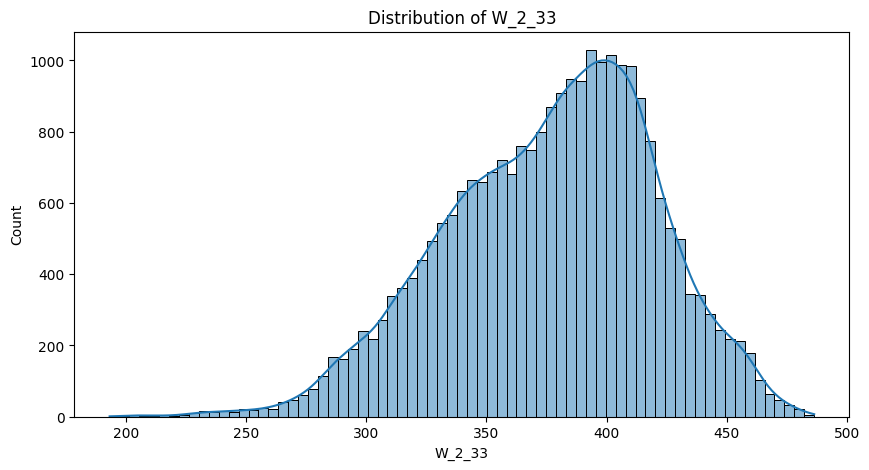

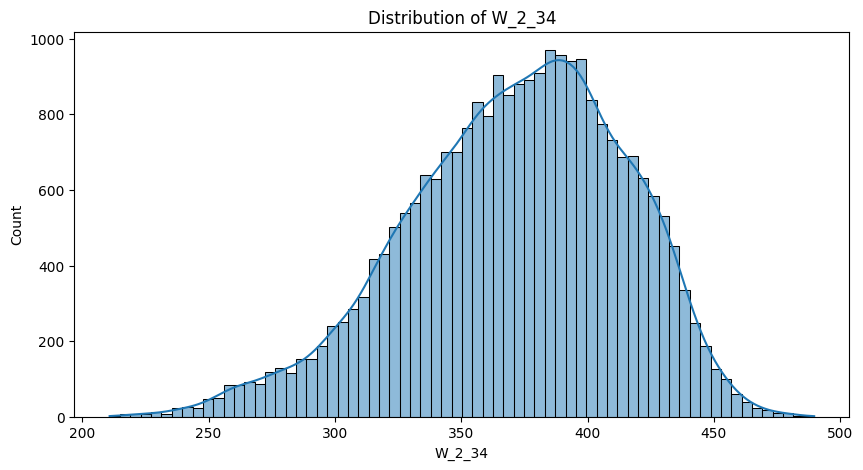

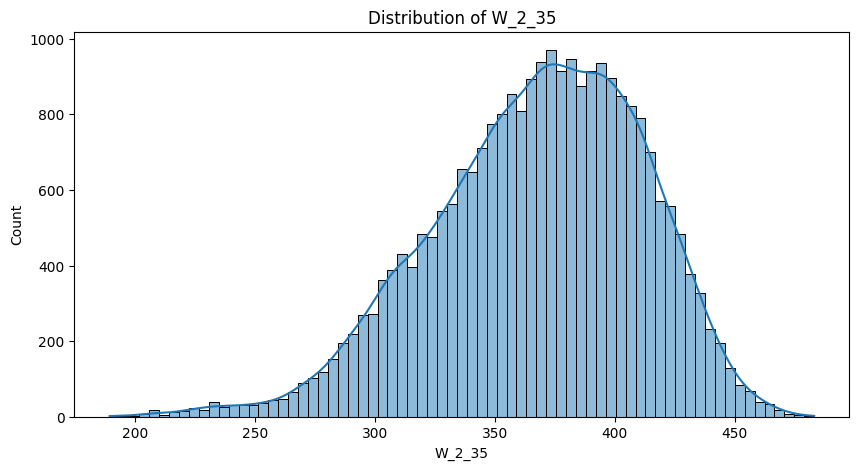

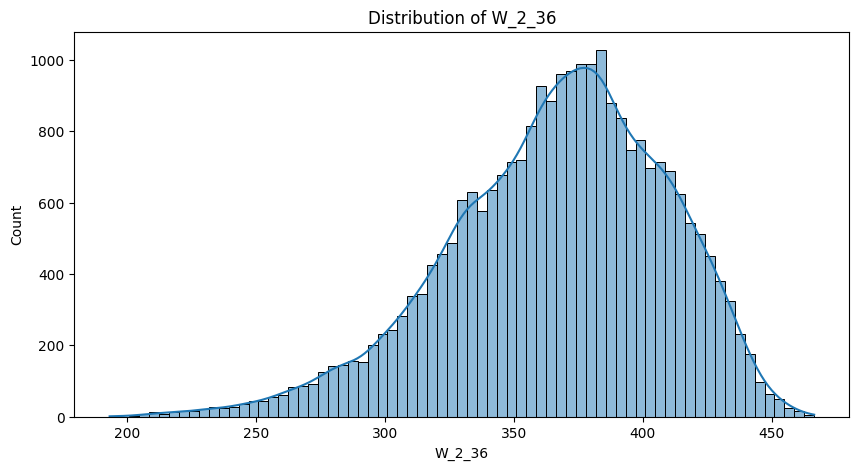

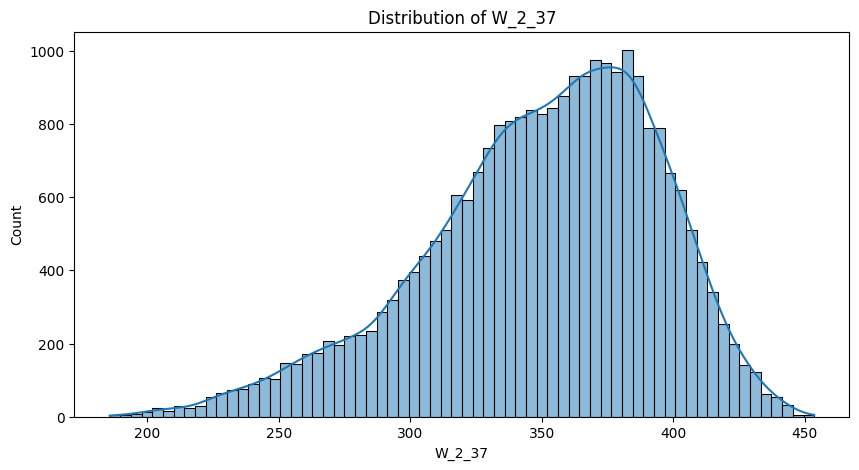

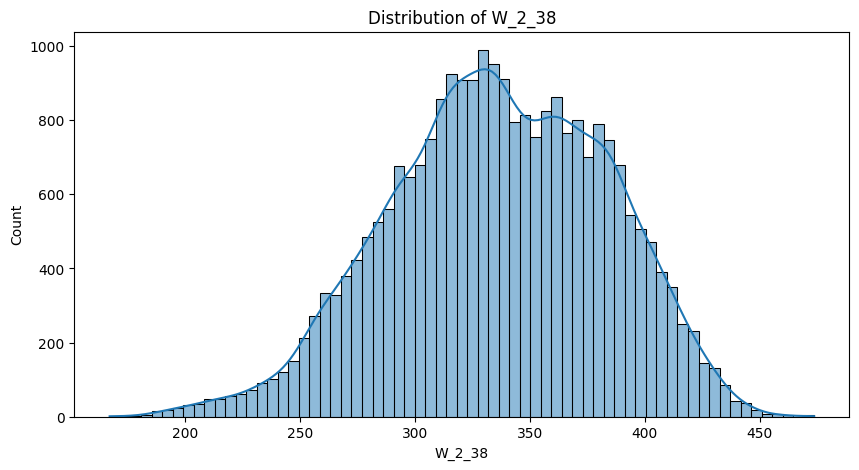

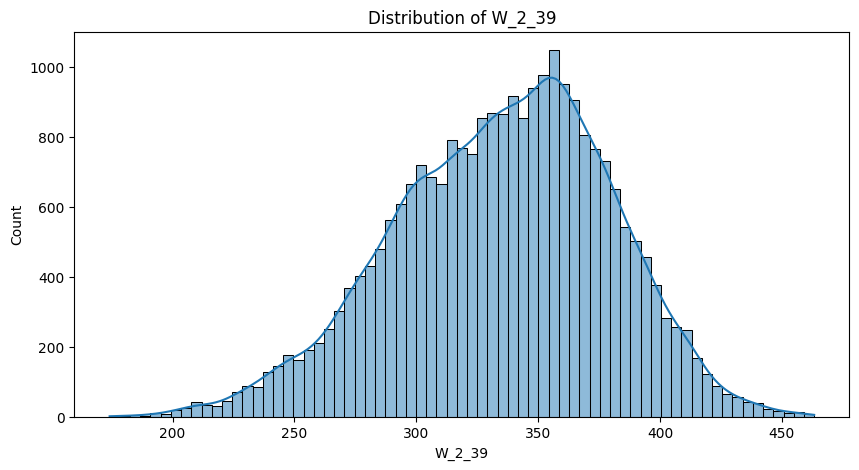

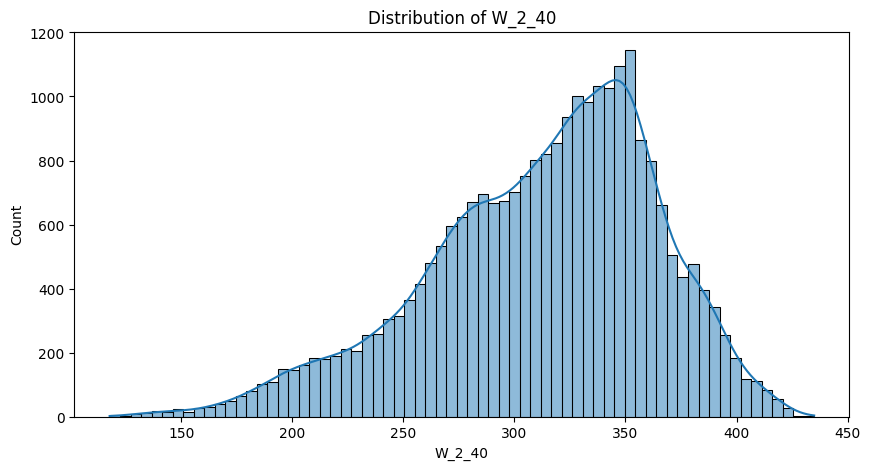

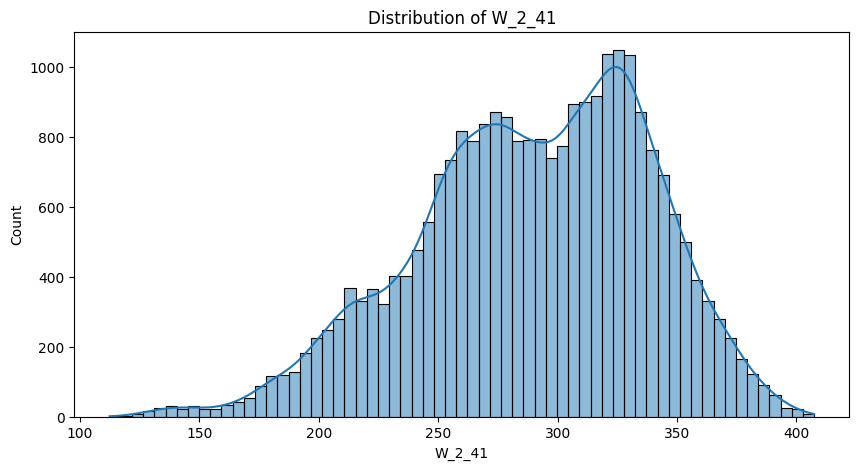

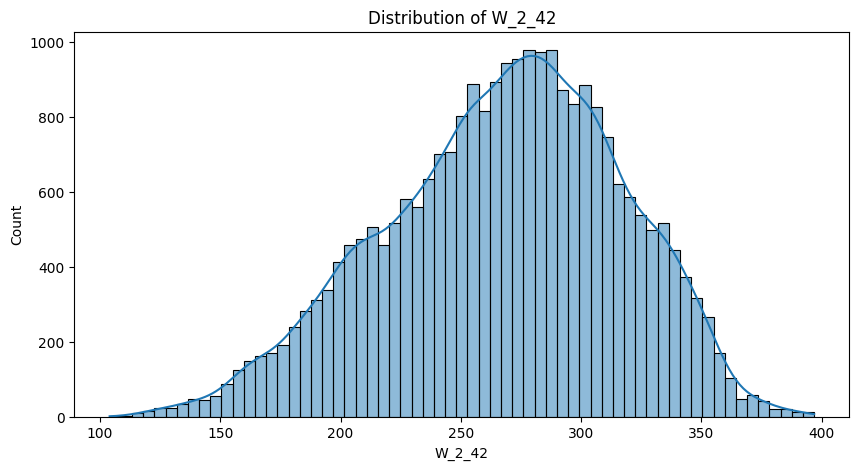

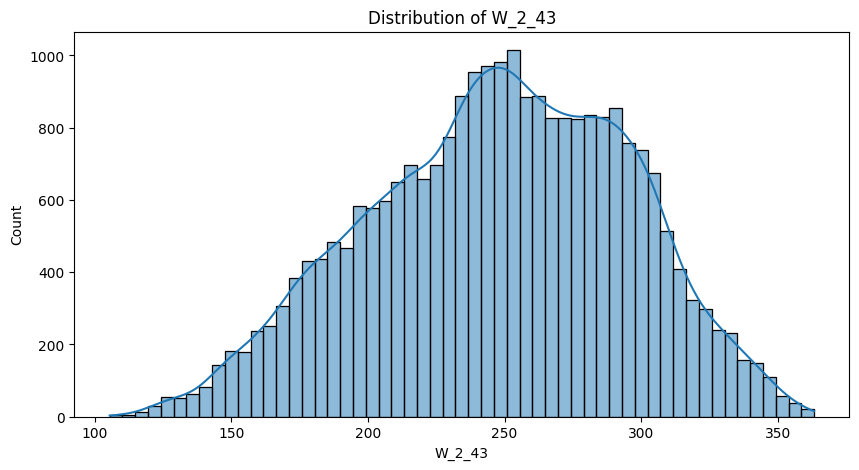

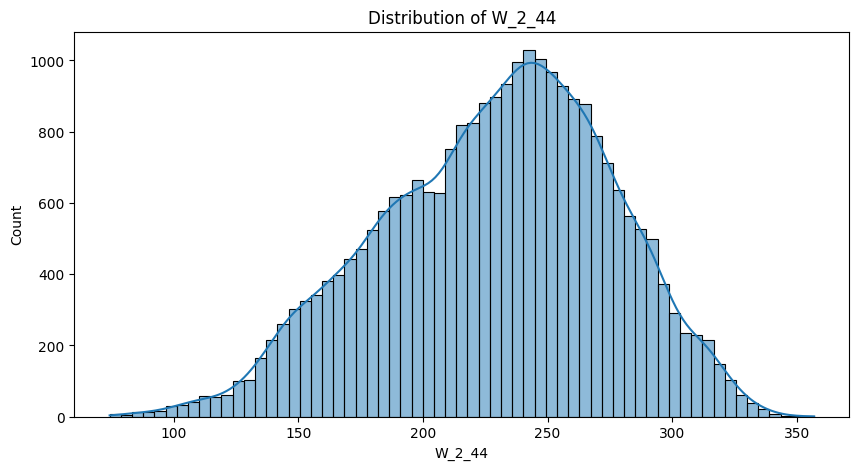

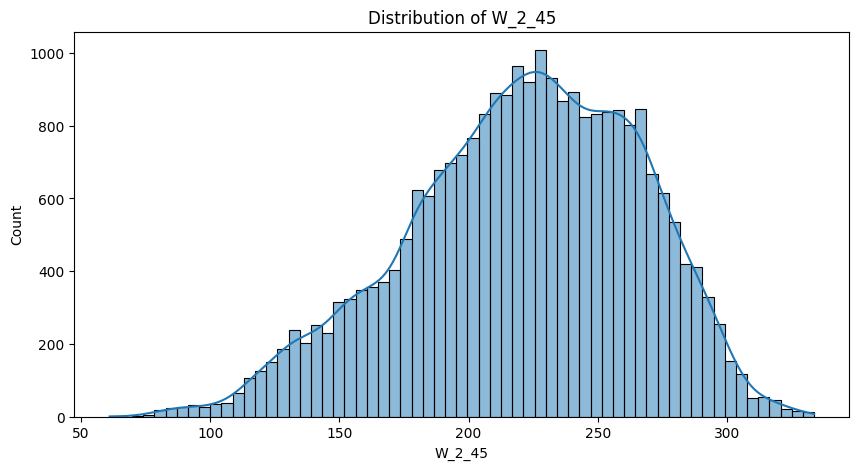

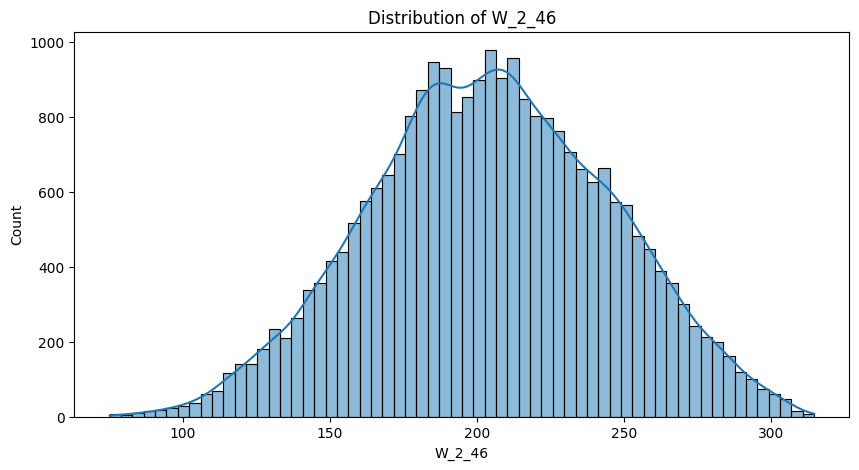

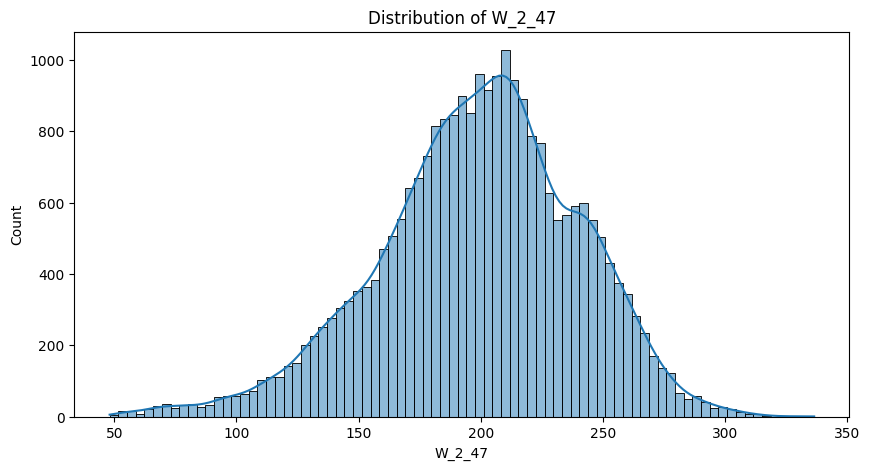

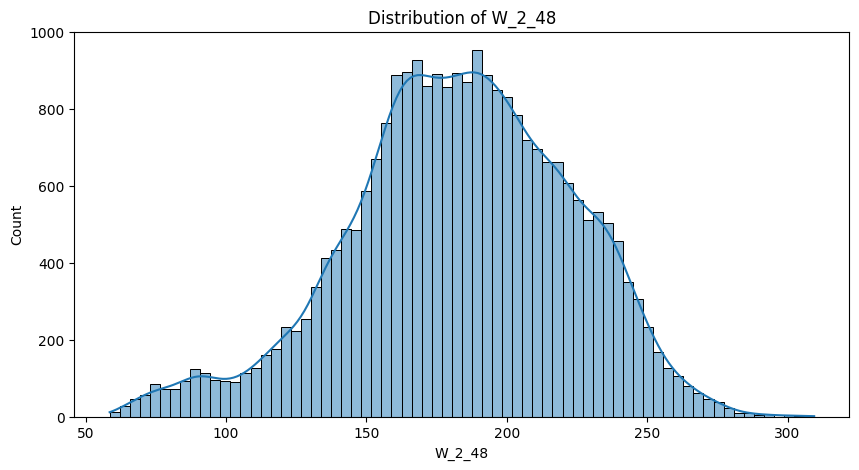

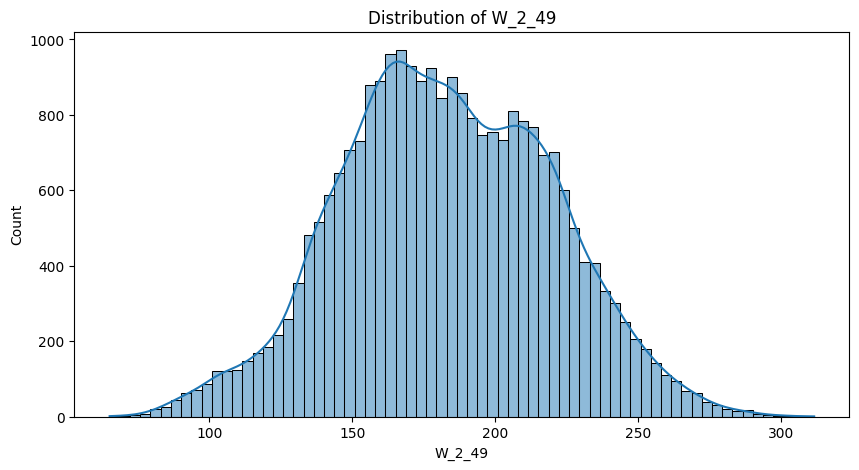

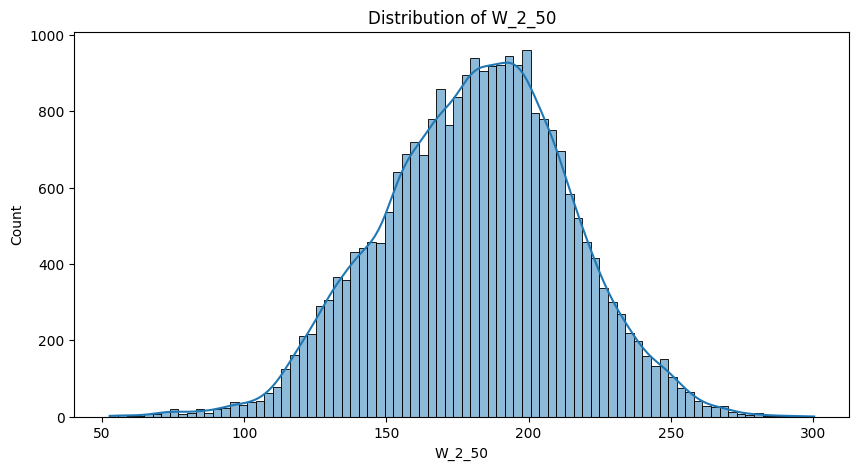

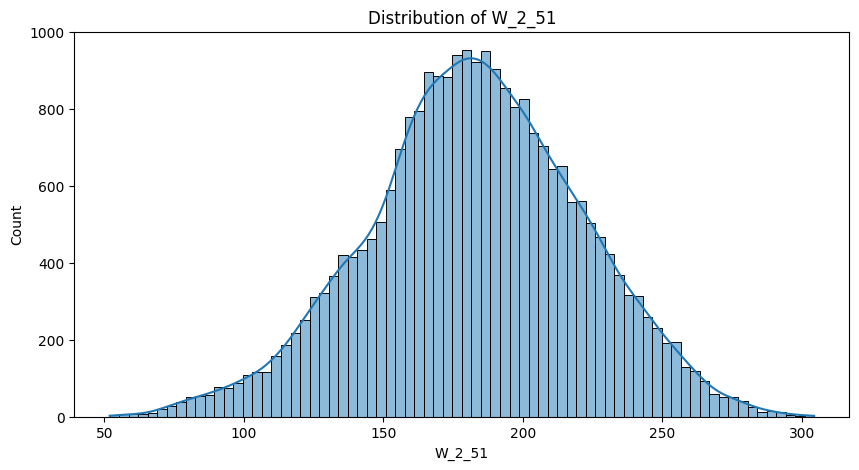

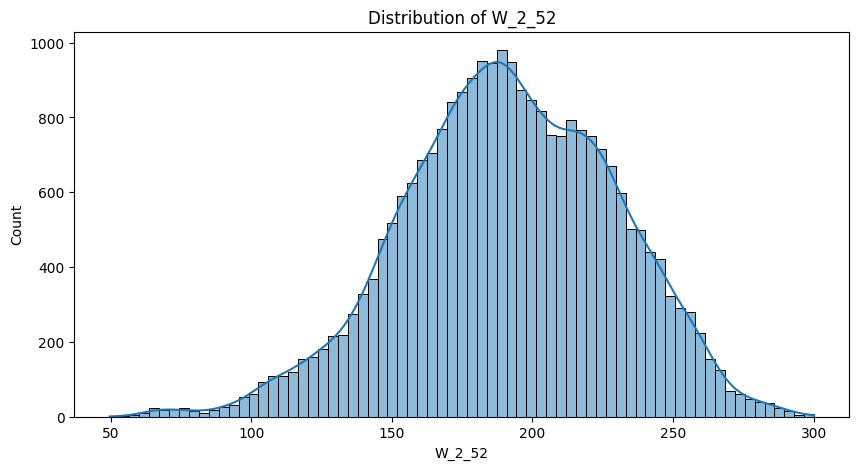

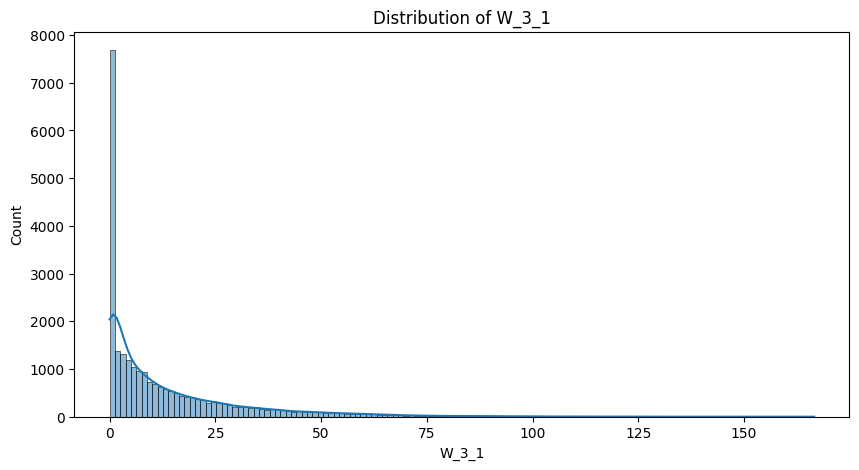

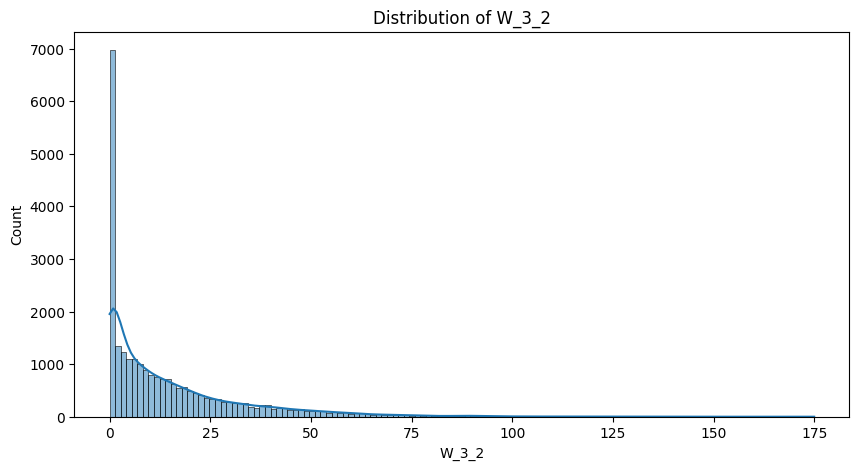

KeyboardInterrupt: 

In [ ]:
# Visualizing the distribution of numerical attributes
num_cols = data.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
file_path2 = 'Soybeans_Loc_ID.csv'
location_data = pd.read_csv(file_path2)

location_data.rename(columns={'ID_loc': 'loc_ID'}, inplace=True)
# Merge the datasets on the common column 'id_loc'
merged_data = pd.merge(data, location_data, on='loc_ID')


In [ ]:
location_data.head()

State     County  loc_ID
0  illinois      adams       0
1  illinois  alexander       1
2  illinois       bond       2
3  illinois      boone       3
4  illinois      brown       4

In [ ]:
merged_data.head()

loc_ID  year  yield     W_1_1     W_1_2     W_1_3     W_1_4     W_1_5  \
0       0  1980   32.5  0.274725  0.000000  1.615385  0.395604  0.967033   
1       0  1981   36.0  0.604396  0.000000  0.043956  0.000000  0.857143   
2       0  1982   37.0  2.098901  0.384615  1.681319  0.527473  6.340659   
3       0  1983   23.0  0.000000  0.000000  0.000000  1.032967  4.373626   
4       0  1984   28.5  0.000000  0.043956  0.197802  0.461538  0.142857   

      W_1_6     W_1_7  ...   P_7   P_8   P_9  P_10  P_11  P_12  P_13  P_14  \
0  0.736264  1.153846  ...   0.0  23.0   3.0   0.0   0.0   0.0   0.0   0.0   
1  1.824176  0.000000  ...  15.0  27.0  15.0  10.0   6.0   4.0   0.0   0.0   
2  1.593407  1.868132  ...   2.0   8.0   5.0   3.0   1.0   1.0   0.0   0.0   
3  0.351648  0.263736  ...  22.0  14.0  16.0   2.0   1.0   0.0   0.0   0.0   
4  0.670330  4.615385  ...  13.0  29.0  10.0   4.0   3.0   1.0   0.0   0.0   

      State  County  
0  illinois   adams  
1  illinois   adams  
2  illinois   adams  
3  illinois   adams  
4  illinois   adams  

[5 rows x 397 columns]

In [ ]:
merged_data.drop(["County"], axis = 1, inplace = True)

In [ ]:
merged_data.head()

loc_ID  year  yield     W_1_1     W_1_2     W_1_3     W_1_4     W_1_5  \
0       0  1980   32.5  0.274725  0.000000  1.615385  0.395604  0.967033   
1       0  1981   36.0  0.604396  0.000000  0.043956  0.000000  0.857143   
2       0  1982   37.0  2.098901  0.384615  1.681319  0.527473  6.340659   
3       0  1983   23.0  0.000000  0.000000  0.000000  1.032967  4.373626   
4       0  1984   28.5  0.000000  0.043956  0.197802  0.461538  0.142857   

      W_1_6     W_1_7  ...   P_6   P_7   P_8   P_9  P_10  P_11  P_12  P_13  \
0  0.736264  1.153846  ...  22.0   0.0  23.0   3.0   0.0   0.0   0.0   0.0   
1  1.824176  0.000000  ...  13.0  15.0  27.0  15.0  10.0   6.0   4.0   0.0   
2  1.593407  1.868132  ...  13.0   2.0   8.0   5.0   3.0   1.0   1.0   0.0   
3  0.351648  0.263736  ...  24.0  22.0  14.0  16.0   2.0   1.0   0.0   0.0   
4  0.670330  4.615385  ...  13.0  13.0  29.0  10.0   4.0   3.0   1.0   0.0   

   P_14     State  
0   0.0  illinois  
1   0.0  illinois  
2   0.0  illinois  
3   0.0  illinois  
4   0.0  illinois  

[5 rows x 396 columns]

Analyzing the 'location' attribute:
count     25345
unique        9
top        iowa
freq       3807
Name: State, dtype: object
Unique values in 'location':
['illinois' 'indiana' 'iowa' 'kansas' 'minnesota' 'missouri' 'nebraska'
 'north dakota' 'south dakota']


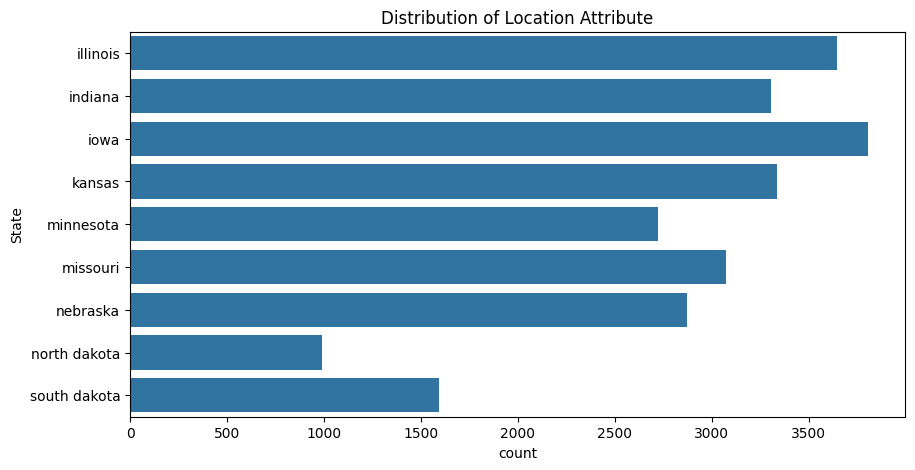

In [ ]:
if 'State' in merged_data.columns:
    print("Analyzing the 'location' attribute:")
    print(merged_data['State'].describe())
    print("Unique values in 'location':")
    print(merged_data['State'].unique())

    plt.figure(figsize=(10, 5))
    sns.countplot(y=merged_data['State'])
    plt.title('Distribution of Location Attribute')
    plt.show()

In [ ]:
def check_inconsistencies(df):
    inconsistencies = {}
    for col in df.columns:
        if df[col].dtype == 'object':
            unique_vals = df[col].unique()
            inconsistencies[col] = [val for val in unique_vals if pd.isnull(val) or not isinstance(val, str)]
        else:
            inconsistencies[col] = df[col][(df[col] < df[col].quantile(0.01)) | (df[col] > df[col].quantile(0.99))].values
    return inconsistencies

In [ ]:
print("Basic Inconsistencies:")
inconsistencies = check_inconsistencies(merged_data)
for col, vals in inconsistencies.items():
    if any(vals):
        print(f"Inconsistencies in {col}: {vals}")
    else:
        print(f"No inconsistencies found in {col}")

Streaming output truncated to the last 5000 lines.
   1.22222222   1.22222222   1.22222222   1.22222222   1.22222222
   1.22222222   1.22222222   1.22222222   1.22222222   1.22222222
   1.22222222   1.22222222   1.22222222   2.36203091   2.36203091
   2.36203091   2.36203091   2.36203091   2.36203091   2.36203091
   2.36203091   2.36203091   2.36203091   2.36203091   2.36203091
   2.36203091   2.36203091   2.36203091   2.36203091   2.36203091
   2.36203091   2.36203091   2.36203091   2.36203091   2.36203091
   2.36203091   2.36203091   2.36203091   2.36203091   2.36203091
   2.36203091   2.36203091   2.36203091   2.36203091   2.36203091
   2.36203091   2.36203091   2.36203091   2.36203091   2.33727811
   2.33727811   2.33727811   2.33727811   2.33727811   2.33727811
   2.33727811   2.33727811   2.33727811   2.33727811   2.33727811
   2.33727811   2.33727811   2.33727811   2.33727811   2.33727811
   2.33727811   2.33727811   2.33727811   2.33727811   2.33727811
   2.33727811   2.3372781

In [ ]:
merged_data.drop(["State"], axis = 1, inplace = True)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25345 entries, 0 to 25344
Columns: 395 entries, loc_ID to P_14
dtypes: float64(393), int64(2)
memory usage: 76.4 MB


In [ ]:
# Calculate variance for each feature
variance = merged_data.var()

# Set a threshold for variance
threshold = 0.95

# Select features that have variance greater than the threshold
selected_features = variance[variance > threshold].index

# Filter the DataFrame to keep only these features
merged_data = merged_data[selected_features]


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25345 entries, 0 to 25344
Columns: 369 entries, loc_ID to P_12
dtypes: float64(367), int64(2)
memory usage: 71.4 MB


In [ ]:
X = merged_data.drop(columns=['yield', 'loc_ID', 'year'])

y = merged_data['yield']


In [ ]:
X.fillna(0, inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [ ]:
scaler = RobustScaler()


X_scaled = scaler.fit_transform(X)

In [ ]:

standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)


minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)


In [ ]:

xgb = XGBRegressor()


xgb.fit(X_scaled, y)

selector = SelectFromModel(xgb, threshold='mean', prefit=True)

X_selected = selector.transform(X_scaled)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', RobustScaler()),
    ('feature_selection', SelectFromModel(XGBRegressor(), threshold='mean', prefit=False))
])

pipeline.fit(X, y)

X_processed = pipeline.transform(X)


In [ ]:
X_processed_df = pd.DataFrame(X_processed, columns=[f'feature_{i}' for i in range(X_processed.shape[1])])


In [ ]:
X_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25345 entries, 0 to 25344
Data columns (total 69 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   25345 non-null  float64
 1   feature_1   25345 non-null  float64
 2   feature_2   25345 non-null  float64
 3   feature_3   25345 non-null  float64
 4   feature_4   25345 non-null  float64
 5   feature_5   25345 non-null  float64
 6   feature_6   25345 non-null  float64
 7   feature_7   25345 non-null  float64
 8   feature_8   25345 non-null  float64
 9   feature_9   25345 non-null  float64
 10  feature_10  25345 non-null  float64
 11  feature_11  25345 non-null  float64
 12  feature_12  25345 non-null  float64
 13  feature_13  25345 non-null  float64
 14  feature_14  25345 non-null  float64
 15  feature_15  25345 non-null  float64
 16  feature_16  25345 non-null  float64
 17  feature_17  25345 non-null  float64
 18  feature_18  25345 non-null  float64
 19  feature_19  25345 non-nul